# **1. Exploratory Data Analysis**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from time import time
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sns.set_style("darkgrid")
sns.color_palette("rocket")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [ ]:
# saving data url into variable
data_url = "https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_da/main/p2p_data_14oct.csv"

In [ ]:
# load the data
df = pd.read_csv(data_url)
df.shape

(62075, 10)

In [ ]:
# showing first 5 lines of the data
df.head()

Unnamed: 0                                            content jenis  \
0           0  saran saya jangan di download aplikasi ini jik...  koin   
1           1  aplikasi fintech     yang tidak bertanggung ja...  koin   
2           2  udh kena biaya pake payment link masa kena   r...  koin   
3           3  jngn di dowload mereka ngambil data kita trmas...  koin   
4           4  kenapa pas masukin data pribadi selalu tidak b...  koin   

                at  score       Dates      Time  year  month tahunbulanku  
0  4/25/2023 22:36      1  2023-04-25  22:36:00  2023      4       2023-4  
1  4/25/2023 17:39      1  2023-04-25  17:39:00  2023      4       2023-4  
2   4/25/2023 3:08      1  2023-04-25  03:08:00  2023      4       2023-4  
3  4/21/2023 18:30      1  2023-04-21  18:30:00  2023      4       2023-4  
4   4/21/2023 4:35      1  2023-04-21  04:35:00  2023      4       2023-4

In [ ]:
# showing null and missing values
df.isnull().sum()

Unnamed: 0      0
content         0
jenis           0
at              0
score           0
Dates           0
Time            0
year            0
month           0
tahunbulanku    0
dtype: int64

In [ ]:
# showing duplicated values
df.duplicated().sum()

0

In [ ]:
# function to calculating the unique values in a column and showing them
def count_unique_value(df, column):
  print(f"Number of unique values in column \033[1m '{column}' \033[0m are : ", df[column].nunique())
  print(f"The unique values in column \033[1m '{column}' \033[0m are : ", sorted(list(df[column].unique())))

In [ ]:
count_unique_value(df, "jenis")

Number of unique values in column  'jenis'  are :  7
The unique values in column  'jenis'  are :  ['danamas', 'finplus', 'investor', 'investre', 'koin', 'pinjamango', 'pinjamduit']


In [ ]:
count_unique_value(df, "score")

Number of unique values in column  'score'  are :  5
The unique values in column  'score'  are :  [1, 2, 3, 4, 5]


In [ ]:
count_unique_value(df, "year")

Number of unique values in column  'year'  are :  2
The unique values in column  'year'  are :  [2022, 2023]


In [ ]:
count_unique_value(df, "month")

Number of unique values in column  'month'  are :  12
The unique values in column  'month'  are :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


- Counting value counts based on some columns

In [ ]:
df.jenis.value_counts().index

Index(['pinjamduit', 'pinjamango', 'finplus', 'koin', 'investor', 'investre',
       'danamas'],
      dtype='object')

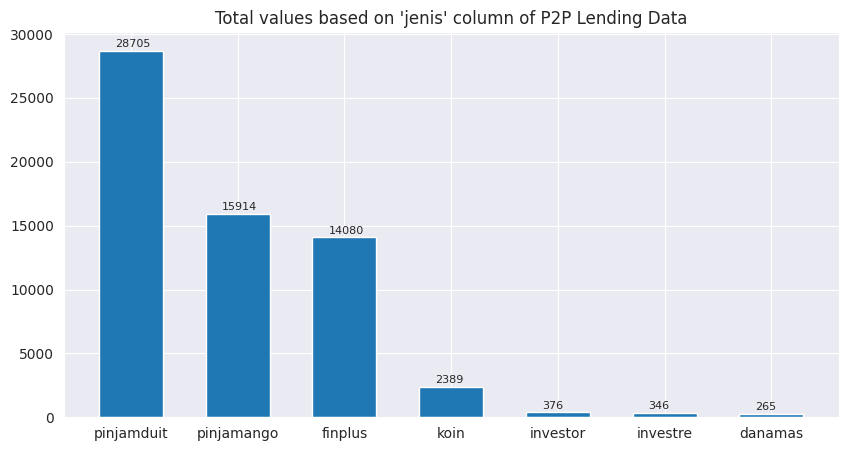

In [ ]:
# calculating values on column jenis
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(df.jenis.value_counts().index, df.jenis.value_counts().tolist(), width=0.6)

for index,data in enumerate(df.jenis.value_counts().tolist()):
    plt.text(x=index-0.15, y=data+300, s=f"{data}" , fontdict=dict(fontsize=8))

plt.title("Total values based on 'jenis' column of P2P Lending Data")
plt.show()

In [ ]:
df.score.value_counts()

5    28062
1    22074
3     4287
2     4227
4     3425
Name: score, dtype: int64

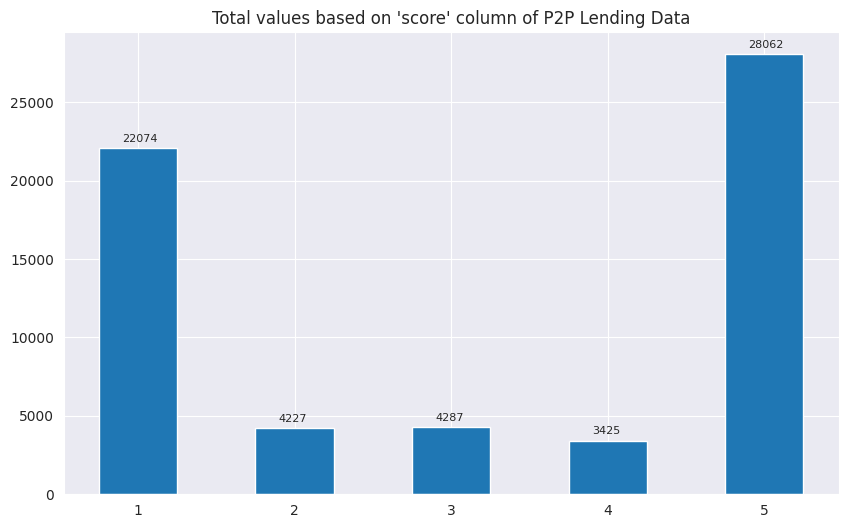

In [ ]:
# calculating values on column score
score_counted = df.score.value_counts().to_frame()
score_counted.reset_index(inplace=True)
score_counted.columns = ["score", "total"]
score_counted_sorted = score_counted.sort_values(by="score")

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(score_counted_sorted['score'], score_counted_sorted['total'], width=0.5)

for index,data in enumerate(score_counted_sorted['total']):
      plt.text(x=index+0.9, y=data+400, s=f"{data}" , fontdict=dict(fontsize=8))

plt.title("Total values based on 'score' column of P2P Lending Data")
plt.show()

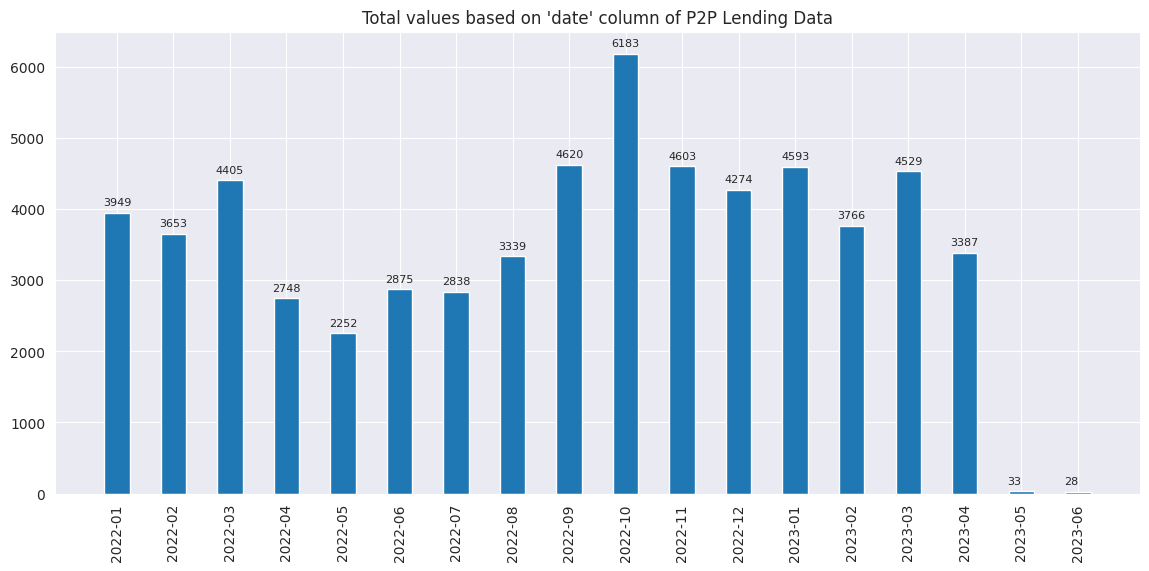

In [ ]:
# calculating values on column tahunbulanku
date_counted = df.tahunbulanku.value_counts().to_frame()
date_counted.reset_index(inplace=True)
date_counted.columns = ["date", "total"]
date_counted['date'] = pd.to_datetime(date_counted['date']).dt.to_period('M')
date_counted_sorted = date_counted.sort_values(by="date")
date_counted_sorted['date'] = date_counted_sorted['date'].astype("str")

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(date_counted_sorted['date'], date_counted_sorted['total'], width=0.45)

for index,data in enumerate(date_counted_sorted['total']):
    plt.text(x=index-0.25, y=data+100, s=f"{data}" , fontdict=dict(fontsize=8))

plt.title("Total values based on 'date' column of P2P Lending Data")
plt.xticks(rotation=90)
plt.show()

_____________________

# **2. Feature Engineering**

In [ ]:
# Extracting only review for our features and switch all the letter to lowercase
data = df['content'].str.lower()

In [ ]:
# Raw data after all letter turned into lower case
data

0        saran saya jangan di download aplikasi ini jik...
1        aplikasi fintech     yang tidak bertanggung ja...
2        udh kena biaya pake payment link masa kena   r...
3        jngn di dowload mereka ngambil data kita trmas...
4        kenapa pas masukin data pribadi selalu tidak b...
                               ...                        
62070    tolong data saya di jagadan tolong data saya d...
62071    minjem gope potongan nya gede banget mikir dua...
62072    mulai hari ini saya atas nama pujiono akan uni...
62073    mau coba semoga aja acc aku lagi butu banget b...
62074    sya mau mnjmm ko gk di acc muluu yh udah mau m...
Name: content, Length: 62075, dtype: object

## **2.1 Removing Stop Words**

In [ ]:
# initiating Indonesian stopwords
stopwords = nltk.corpus.stopwords.words('indonesian')

# checking the length of the stopwords
print("The length of stopwrods are : ", len(stopwords), "words.")

The length of stopwrods are :  758 words.


In [ ]:
# List of additional stop words to add
additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'sy','saya','kalo', 'amp', 'biar', 'bikin','ini',
                      'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'alhamdulilah', 'amanah', 'anak', 'gua',
                      'sayasaya', 'kpd', 'dan', 'allah', 'jt', 'sya', 'di','ke', 'dari', 'at', 'ok', 'aku', 'aja','tidak', 'nya', 'lagi','ini','tapi', 'gue', 'saya', 'ya', 'jdi', 'ni', 'ad', 'nya', 'yang','anda', 'kami', 'ke', 'gopay', 'buat', 'dan', 'gk', 'bs', 'akan', 'jika', 'ovo',  'dh', 'hr','pd', 'linkaja', 'gojek', 'pinjamango', 'pinjamduit', 'koinworks', 'danamas','dokuwaller', 'pinjamindo', 'finplus', 'kreditpintar','karena', 'untuk', 'kita', 'saat', 'kok', 'ku', 'krna', 'tak', 'jngn', 'per', 'ada', 'rupiah',
                      'the', 'oke', 'deh', 'aplikasi', 'yaa', 'apk','sen', 'no', 'lg', 'ko', 'trs', 'an', 'terimakasih',
                      'makasih','is', 'ka', 'karna', 'lgi', 'slalu', 'tapi','tpi', 'moga', 'yaaa', 'dpt', 'dlm', 'doku',
                      'fin', 'kak', 'wow', 'amin', 'karena', 'kn', 'akn', 'pmh', 'alhamdulillah', 'saya', 'yth',
                      'tks', 'tq', 'trimah', 'trima', 'trimakasi', 'thanks', 'kasih','tingal''kota', 'batu',
                      'juga', 'trimakasih', 'dong', 'pintar', 'jadi', 'kepada', 'pinjol','duit', 'bln', 'mah', 'gaji',
                      'ajuan','ajukan', 'kena', 'top', 'enak', 'kayak', 'mending','mendingan', 'time', 'sm', 'klu',
                      'suruh','mau', 'apa', 'kenapa', 'guna', 'pake', 'kata', 'selalu', 'saja', 'tiap',
                      'muas','tidak','zy','ng','hp','donk','bner', 'mhn','anjing', 'aceh', 'nntim', 'ksih', 'kec',
                      'indonesia', 'moga', 'asu', 'lu', 'udah', 'banget','mohon','kan', 'gara', 'suka', 'tiap', 'hanya',
                      'punya', 'tanya', 'sudah','padahal', 'baik', 'coba', 'begitu', 'oleh', 'segala', 'macam','makan',
                      'aneh', 'min', 'apa', 'bank', 'nama', 'sampai', 'full', 'login', 'gini','gini', 'mah', 'kadang',
                      'kayak', 'enak', 'terima', 'baharu', 'sm', 'bos', 'klu','pdhl', 'males', 'ingin', 'tanpa', 'ewalet',
                      'haryanto', 'mengapa', 'muhamad','dwi','syaa','nggk','sangat', 'pagi', 'driver', 'dah', 'org',
                      'pundi','bintang', 'makan', 'order','gak', 'gx', 'gk', 'ngk', 'ngga', 'ra', 'tdk', 'tdk', 'td', 'ga',
                      'sekian', 'klau','sore', 'jaga', 'teman','lain', 'via', 'itu', 'tidak', 'lalu', 'pas', 'saya', 'eh',
                      'kena', 'kali', 'tetep', 'bca', 'kirem','rb', 'lah', 'mulu', 'gimana', 'doang', 'nanti', 'memang',
                      'hari', 'sama', 'baik', 'juga','minggu', 'februari', 'knpa', 'tgl', 'mksh', 'nnti', 'bismillah',
                      'dta','uda', 'januari','in', 'ig', 'indo','indra','ilham','istri','disaat','bingung', 'klw',
                      'hingga', 'jam', 'diri', 'aj', 'nggak', 'gin', 'pun','gara', 'gitu', 'aq', 'dr', 'blum',
                      'oleh', 'segala', 'pdhl', 'entah', 'knp', 'tiba', 'ngerti', 'sana', 'bagaimana','hai','engga','dri',
                      'apapun', 'juga', 'jngan','bukan', 'sini', 'bapak', 'tadi', 'malam', 'jga', 'september', 'serta',
                      'haryanto','ngasih','muhammad','hri','thankyou','thank', 'jadi', 'dengan', 'dalam', 'adapundi',
                      'go', 'atau', 'atas', 'dn','kl','kaga','ini','inih','inidih','si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                      'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe','rp','inii', 'inidi', 'inidan', 'inijika','inijadi',
                      'inikarena','inikarna', 'iniapabila','pen', 'u', 'nan', 'loh', 'rt', '&amp','yah','orang','hati','masak',
                      'tp','gw','ngak','temen','dlu','ksh','lgsg','disitu','cmn', 'jg', 'udh', 'smoga','kasi','ini', "yg",
                      "dg","rt", "dgn", "ny", "d", 'klo', 'sy','saya','kalo', 'amp', 'biar', 'bikin','bilang', 'gak', 'ga',
                      'krn', 'nya','nih', 'sih', 'alhamdulilah', 'amanah', 'anak', 'gua','sayasaya', 'kpd', 'dan', 'allah',
                      'jt', 'sya','di','ke', 'dari', 'at', 'ok', 'aku', 'aja','tidak', 'nya', 'lagi','ini','tapi', 'gue',
                      'saya', 'ya', 'jdi', 'ni', 'ad', 'nya', 'yang','anda', 'kami', 'ke', 'gopay', 'buat', 'dan', 'gk',
                      'bs', 'akan', 'jika', 'ovo',  'dh', 'hr','pd', 'linkaja', 'gojek', 'pinjamango', 'pinjamduit',
                      'koinworks', 'danamas','dokuwaller','pinjamindo', 'finplus', 'kreditpintar']

In [ ]:
# Adding additional stop words into the main stop word list
for word in additional_stopwords:
  stopwords.append(word)

# Checking the new list of stopwords
print("The Length of new stop words list", len(stopwords))

The Length of new stop words list 1231


In [ ]:
# Defining a function to remove stop words from a sentence
def remove_stop_words(sentences):

  clean_sentences = []

  for sentence in sentences:
    # Spliting the sentence into individual words
    words = sentence.split()

    # Using a list comprehension to remove stop words
    filtered_words = [word for word in words if word not in stopwords]

    # Making filetered words into sentences back
    sentenced_back = ' '.join(filtered_words)

    # Appending clean data into new list
    clean_sentences.append(sentenced_back)

  # Joining the filtered words back into a sentences
  return clean_sentences

- The number of record after stop words removal are still the same as shown below.

In [ ]:
# Applying stop words removal function into data
clean_data = remove_stop_words(data)

print("- Length of data before stopwords removal", len(data))
print("- Length of data after stopwords removal",  len(clean_data))

- Length of data before stopwords removal 62075
- Length of data after stopwords removal 62075


## **2.2 Data Normalization**

In [ ]:
# Loading data for normalization reference
norm_data_url = "https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_lda/main/normalisasi_indonesia.csv"

norm_data = pd.read_csv(norm_data_url)
norm_data = norm_data[['before', 'after']]

# Showing the first five rows
norm_data.head()

before  after
0    gak  tidak
1     gx  tidak
2     gk  tidak
3    ngk  tidak
4   ngga  tidak

In [ ]:
# Checking normalization reference length
print("The length of data normalization are : ", len(norm_data))

The length of data normalization are :  15199


In [ ]:
# Changing normalization reference dataframe into dict
norm_dict = norm_data.set_index('before')['after'].to_dict()

# Checking normalization reference length after become dict
len(norm_dict)

9893

In [ ]:
# Making new variable for new normalized data
# This takes around running 16 minutes running time on 16GB of RAM
# Be careful if you want to re-run it
normalized_data = []

# Function for normalization references
def replace(match):
    return norm_dict[match.group(0)]


# Looping all data for the normalization
for sentence in clean_data:
    # Changing words into the normalization ones in word level
    new_sentence = re.sub('|'.join(r'\b%s\b' % re.escape(s) for s in norm_dict), replace, sentence)
    # Appending into new list
    normalized_data.append(new_sentence)

- Comparing the data before and after normalization.

In [ ]:
# Checking the data before and after normalization
print("\n - Before Normalization")
print(clean_data[2])
print("\n - After normalization")
print(normalized_data[2])


 - Before Normalization
biaya payment link ribu aslii bgt feenya tinggalin

 - After normalization
biaya payment link ribu asli banget feenya tinggalin


In [ ]:
# initiating features into variables
n_samples = 62075
ngram_range = (1, 2)
n_features = 5000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [ ]:
# defining function to plot words and topics
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 25), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_lda/main/full_data.csv")
# df = df[['data', 'label', 'label.1']]
# df.columns = ['data', 'topik', 'sentimen']
# df.head()

data  topik sentimen
0  saran download uang hilangsaya transfer dana q...      6  negatif
1  fintech bertanggungjawab pendanaan pendanaan t...      3  negatif
2  biaya payment link ribu asli banget feenya tin...      1  negatif
3  dowload ngambil data trmasuk kk mlah ajuin mrk...      5  negatif
4       masukin data pribadi mendanai hrs butuh data      7   netral

In [ ]:
# normalized_data = df['data'].dropna().copy()

## **2.2 Count Vectorizer**

In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting term count features...")

tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words=stopwords
)

t0 = time()
tf = tf_vectorizer.fit_transform(normalized_data)

# Getting features name of term count
tf_feature_names = tf_vectorizer.get_feature_names_out()

print("Done extracting term count in %0.3fs." % (time() - t0))

Extracting term count features...


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Done extracting term count in 0.886s.


## **2.3 TF-IDF Vectorizer**

In [ ]:
# Transforming sentences into TF-IDF vectors as the features
print("Extracting tf-idf features...")

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features,
    ngram_range=(1,2), stop_words=stopwords
)

t0 = time()
tfidf = tfidf_vectorizer.fit_transform(normalized_data)

print("Done extracting tf-idf features in %0.3fs." % (time() - t0))

Extracting tf-idf features...
Done extracting tf-idf features in 3.269s.


- Now we have sparse matrix with shape 62.075 x 5.000 as shown below.

In [ ]:
#showing tfidf features
tfidf

<62075x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 550149 stored elements in Compressed Sparse Row format>

__________

# **3. Modelling for Topic Extracting**

## **3.1 Modelling with TF-IDF**

### **3.1.1 Non-negative Matrix Factorization (NMF) Model**

Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically.


<i> - Suvrit Sra; Inderjit S. Dhillon (2006). Generalized Nonnegative Matrix Approximations with Bregman Divergences (PDF). ISBN 978-0-262-23253-1.<i>

The objective function is:

$$
\begin{align}\begin{aligned}L(W, H) &= 0.5 * ||X - WH||_{loss}^2\\&+ alpha\_W * l1\_ratio * n\_features * ||vec(W)||_1\\&+ alpha\_H * l1\_ratio * n\_samples * ||vec(H)||_1\\&+ 0.5 * alpha\_W * (1 - l1\_ratio) * n\_features * ||W||_{Fro}^2\\&+ 0.5 * alpha\_H * (1 - l1\_ratio) * n\_samples * ||H||_{Fro}^2\end{aligned}\end{align}
$$

Where:
- $||A||_{Fro}^2 = \sum_{i,j} A_{ij}^2$  (Frobenius norm)
- $||vec(A)||_1 = \sum_{i,j} abs(A_{ij})$ (Elementwise L1 norm)

The generic norm $||X - WH||_{loss}$ may represent the Frobenius norm or another supported beta-divergence loss. The choice between options is controlled by the `beta_loss` parameter.

The regularization terms are scaled by `n_features` for W and by `n_samples` for H to keep their impact balanced with respect to one another and to the data fit term as independent as possible of the size `n_samples` of the training set.

The objective function is minimized with an alternating minimization of W and H.

Note that the transformed data is named W and the components matrix is named H. In the NMF literature, the naming convention is usually the opposite since the data matrix X is transposed.

**References:**

- “Fast local algorithms for large scale nonnegative matrix and tensor factorizations” Cichocki, Andrzej, and P. H. A. N. Anh-Huy. IEICE transactions on fundamentals of electronics, communications and computer sciences 92.3: 708-721, 2009.

- “Algorithms for nonnegative matrix factorization with the beta-divergence” Fevotte, C., & Idier, J. (2011). Neural Computation, 23(9).


#### **3.1.1.1 NMF of Frobenius Norm**

$$d_{\mathrm{Fro}}(X, Y) = \frac{1}{2} ||X - Y||_{\mathrm{Fro}}^2 = \frac{1}{2} \sum_{i,j} (X_{ij} - {Y}_{ij})^2$$

The hyper-parameters of the model are as follow :
- initialization : `nndsvda`
- beta_loss : `frobenius`
- alpha_W : `0.00005`
- alpha_H : `0.00005`
- solver : `cd` (Coordinate Descent )

In [ ]:
# Fiting the data into NMF model of Frobenius Norm
print(
    "Fitting the NMF model (Frobenius Norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=566,
    init=init,
    solver='cd',
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)

print("Model fitting done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius Norm) with tf-idf features, n_samples=62075 and n_features=5000...
Model fitting done in 1.413s.


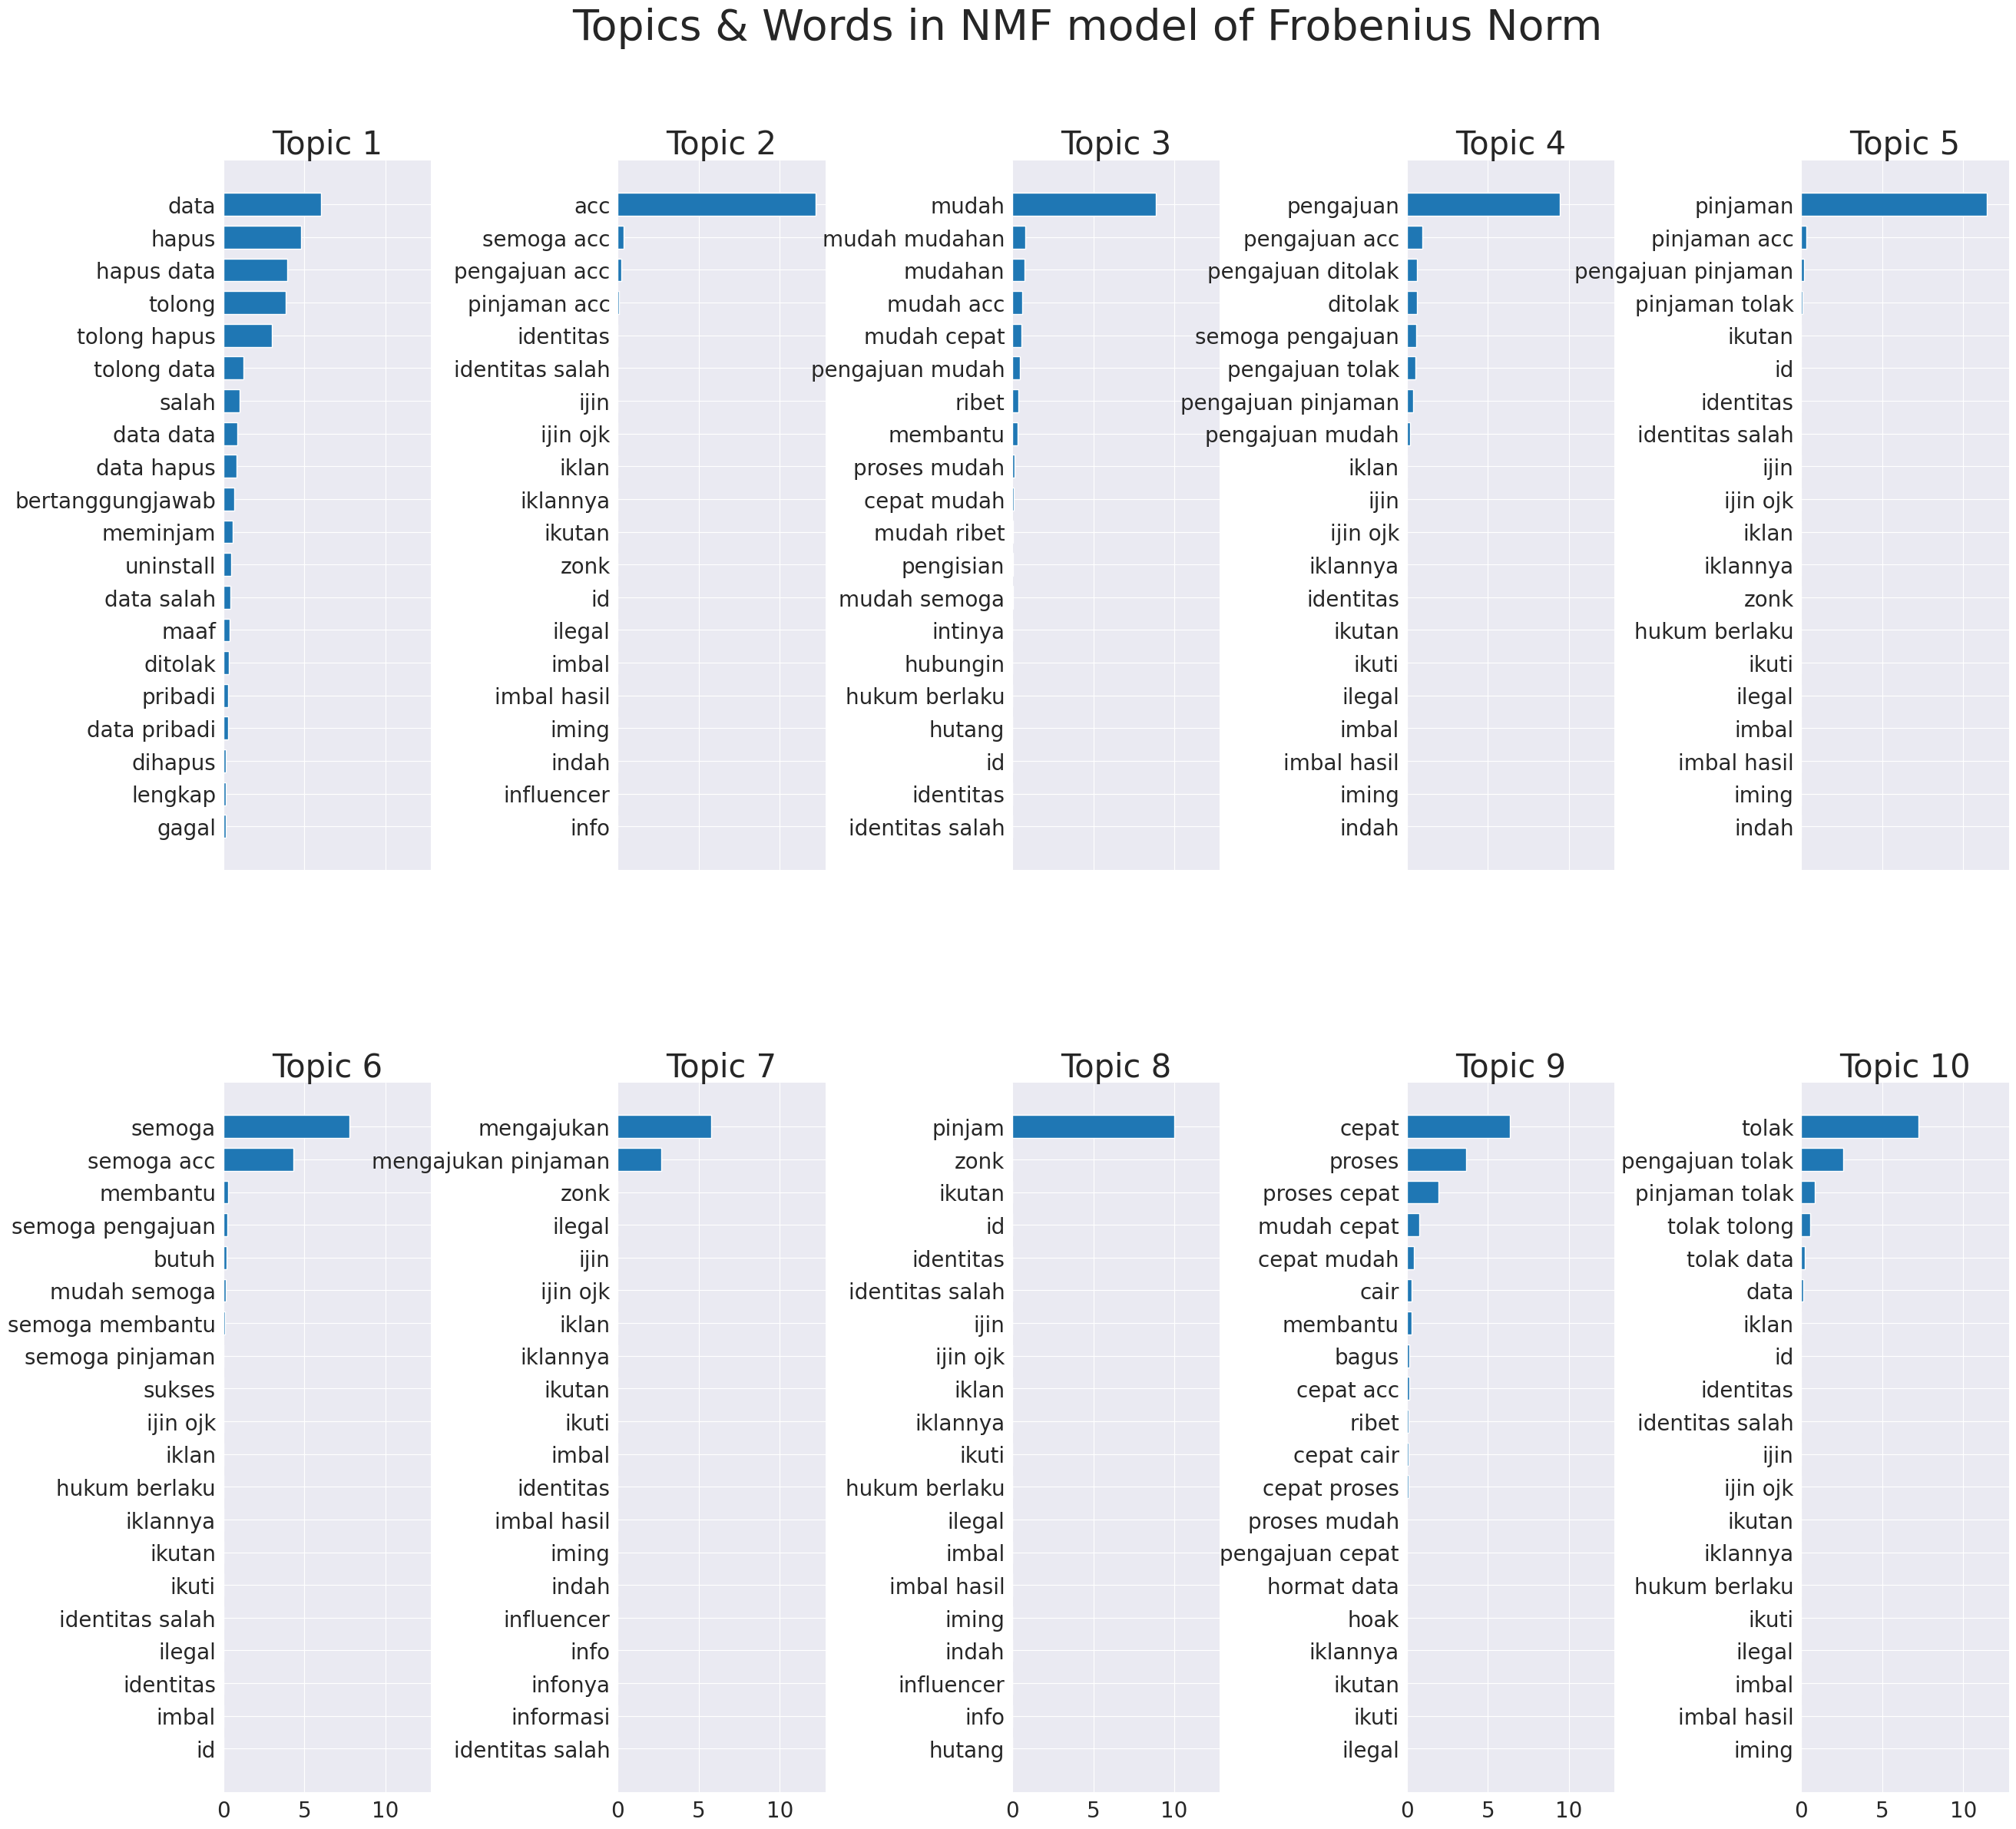

In [ ]:
# Getting Features
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Plotting top words from Frobenius Norm
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics & Words in NMF model of Frobenius Norm"
)

#### **3.1.1.2 NMF of Generalized Kullback-Leibler Divergence**

$$
d_{KL}(X, Y) = \sum_{i,j} (X_{ij} \log(\frac{X_{ij}}{Y_{ij}}) - X_{ij} + Y_{ij})
$$

The hyper-parameters of the model are as follow :
- initialization : `nndsvda`
- beta_loss : `kullback-leibler`
- alpha_W : `0.00005`
- alpha_H : `0.00005`
- solver : `mu` (Multiplicative Update )

In [ ]:
# Fiting the data into NMF model of Generalized Kullback-Leibler Divergence
print(
    "\n" * 2,
    "Fitting the NMF model of Generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=566,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)

print("Model fiting done in %0.3fs." % (time() - t0))



 Fitting the NMF model of Generalized Kullback-Leibler divergence) with tf-idf features, n_samples=62075 and n_features=5000...
Model fiting done in 20.302s.


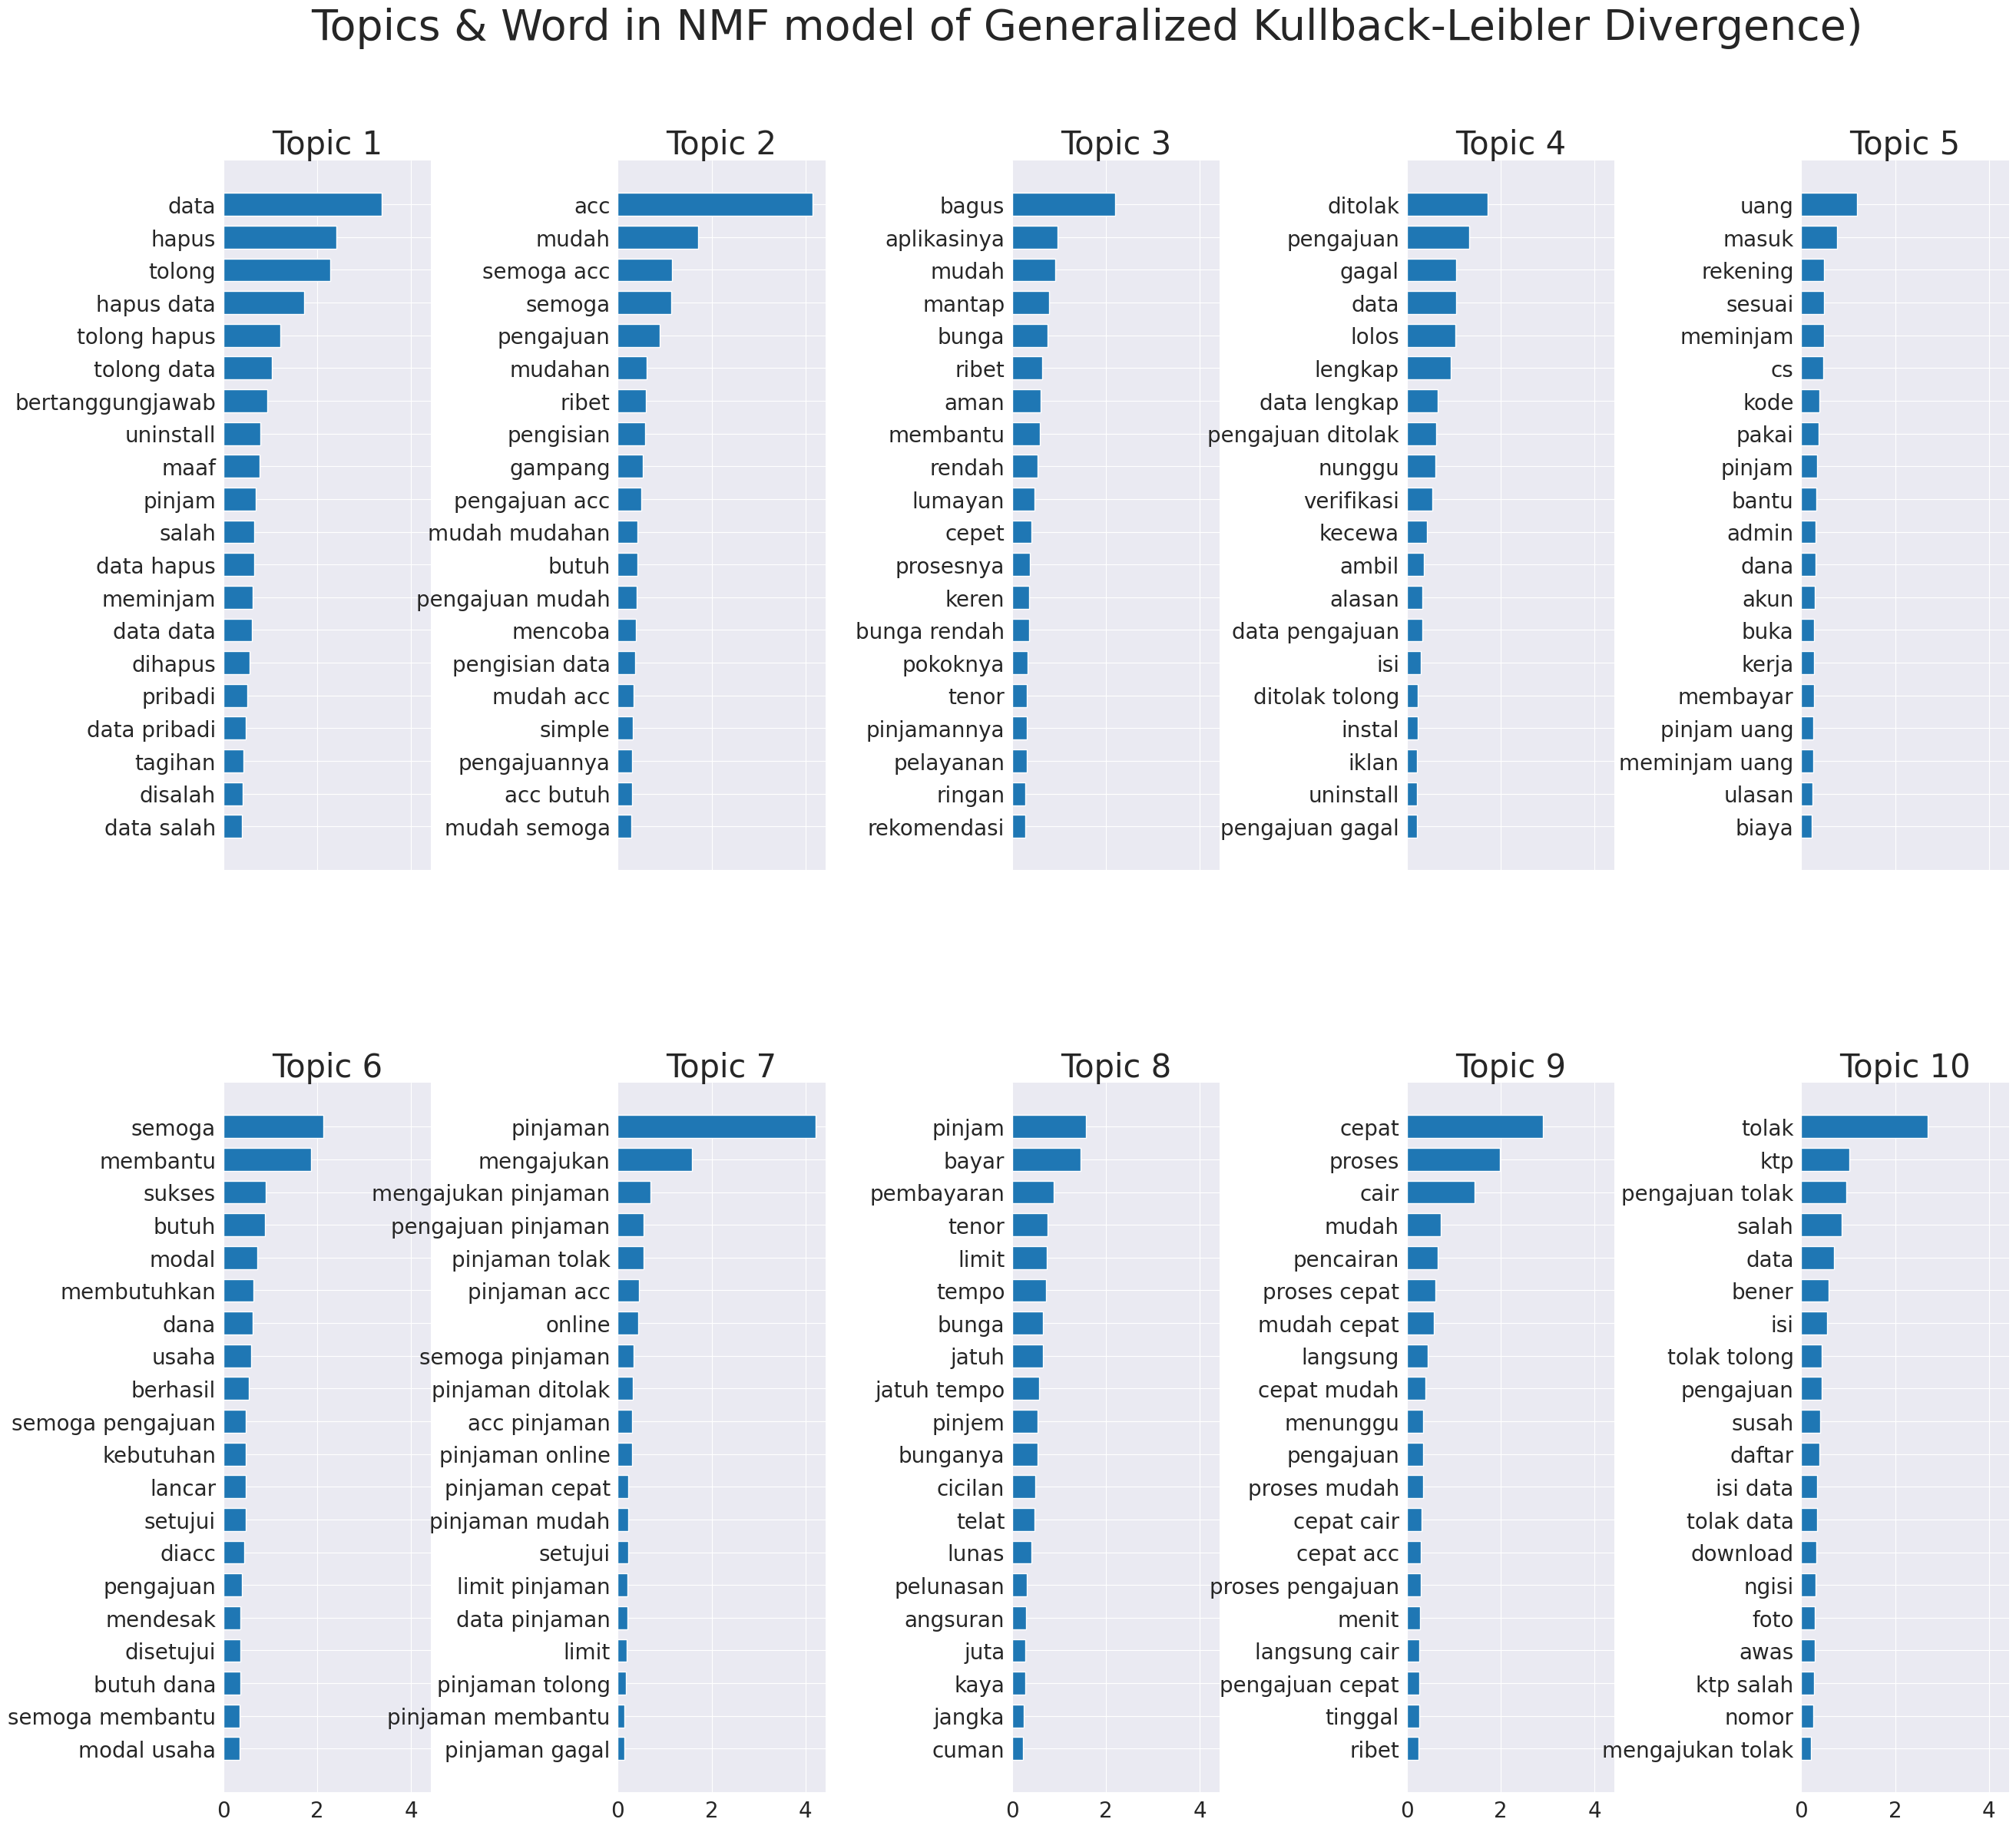

In [ ]:
# Plotting toopic and top words from Generalized Kullback-Leibler Divergence
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics & Word in NMF model of Generalized Kullback-Leibler Divergence)",
)

### **3.1.2 Latent Dirichlet Allocation (LDA) Model**

**Latent Dirichlet Allocation (LDA)** is a Bayesian network (and, therefore, a generative statistical model) that explains a set of observations through unobserved groups, and each group explains why some parts of the data are similar. The LDA is an example of a Bayesian topic model. In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. Each document will contain a small number of topics.

In the context of population genetics, LDA was proposed by J. K. Pritchard, M. Stephens and P. Donnelly in 2000.

LDA was applied in machine learning by David Blei, Andrew Ng and Michael I. Jordan in 2003.

<i> - Blei, David M.; Ng, Andrew Y.; Jordan, Michael I (January 2003). Lafferty, John (ed.). "Latent Dirichlet Allocation". Journal of Machine Learning Research. 3 (4–5): pp. 993–1022. doi:10.1162/jmlr.2003.3.4-5.993. </i>

For parameter estimation, the posterior distribution is:

$$
p(z, \theta, \beta |w, \alpha, \eta) =
  \frac{p(z, \theta, \beta|\alpha, \eta)}{p(w|\alpha, \eta)}
$$

Since the posterior is intractable, variational Bayesian method uses a simpler distribution $q(z,\theta,\beta | \lambda, \phi, \gamma)$ to approximate it, and those variational parameters $ \lambda, \phi,\gamma $ are optimized to maximize the Evidence Lower Bound (ELBO):

$$
\log\: P(w | \alpha, \eta) \geq L(w,\phi,\gamma,\lambda) \overset{\triangle}{=}
  E_{q}[\log\:p(w,z,\theta,\beta|\alpha,\eta)] - E_{q}[\log\:q(z, \theta, \beta)]
$$

Maximizing ELBO is equivalent to minimizing the Kullback-Leibler(KL) divergence between $q(z,\theta,\beta)$ and the true posterior $p(z, \theta, \beta |w, \alpha, \eta)$.

**References:**

- “Latent Dirichlet Allocation” D. Blei, A. Ng, M. Jordan, 2003
- “Online Learning for Latent Dirichlet Allocation” M. Hoffman, D. Blei, F. Bach, 2010
- “Stochastic Variational Inference” M. Hoffman, D. Blei, C. Wang, J. Paisley, 2013
- “The varimax criterion for analytic rotation in factor analysis” H. F. Kaiser, 1958



In [ ]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=566,
)

t0 = time()
lda.fit(tfidf)
print("done in %0.3fs." % (time() - t0))

done in 38.063s.


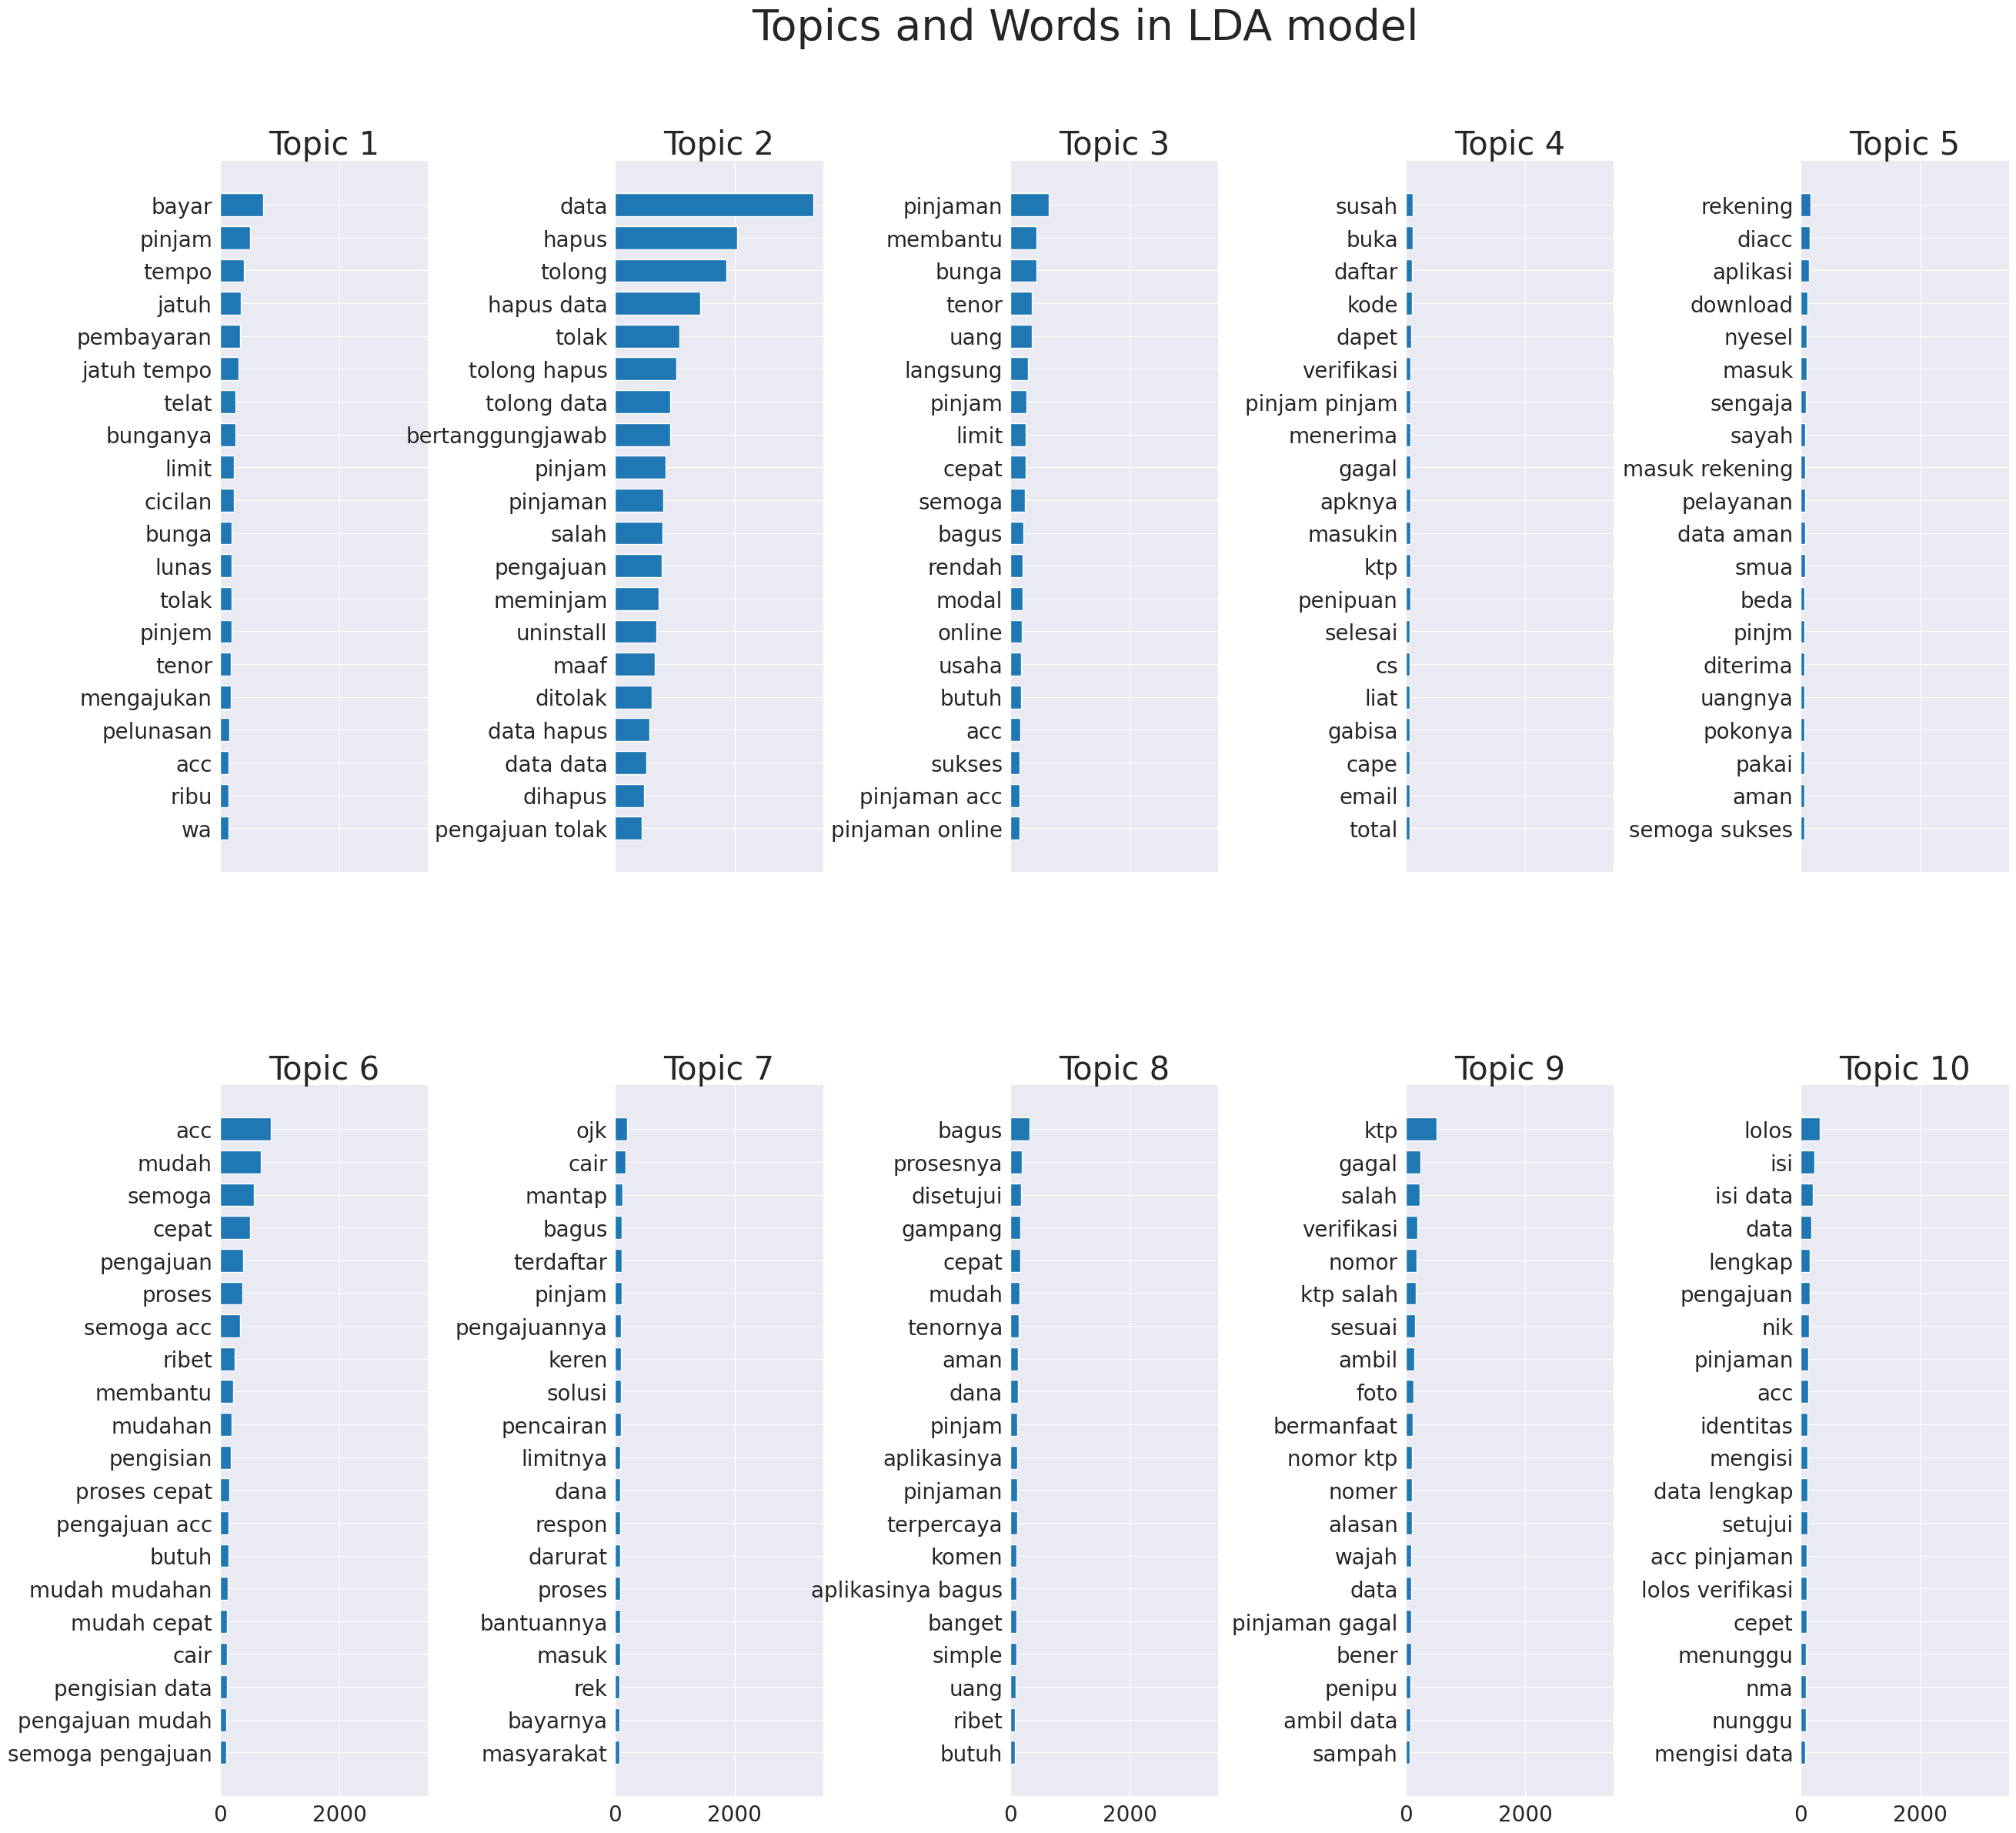

In [ ]:
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics and Words in LDA model")

## **3.2 Modelling with Term Count**

### **3.2.1 Non-negative Matrix Factorization (NMF) Model**

#### **3.2.1.1 NMF of Frobenius Norm**

In [ ]:
# Fiting the data into NMF model of Frobenius Norm
print(
    "Fitting the NMF model (Frobenius Norm) with term count features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)

t0 = time()

nmf = NMF(
    n_components=n_components,
    random_state=566,
    init=init,
    solver='cd',
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tf)

print("Model fitting done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius Norm) with term count features, n_samples=62075 and n_features=5000...
Model fitting done in 4.682s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


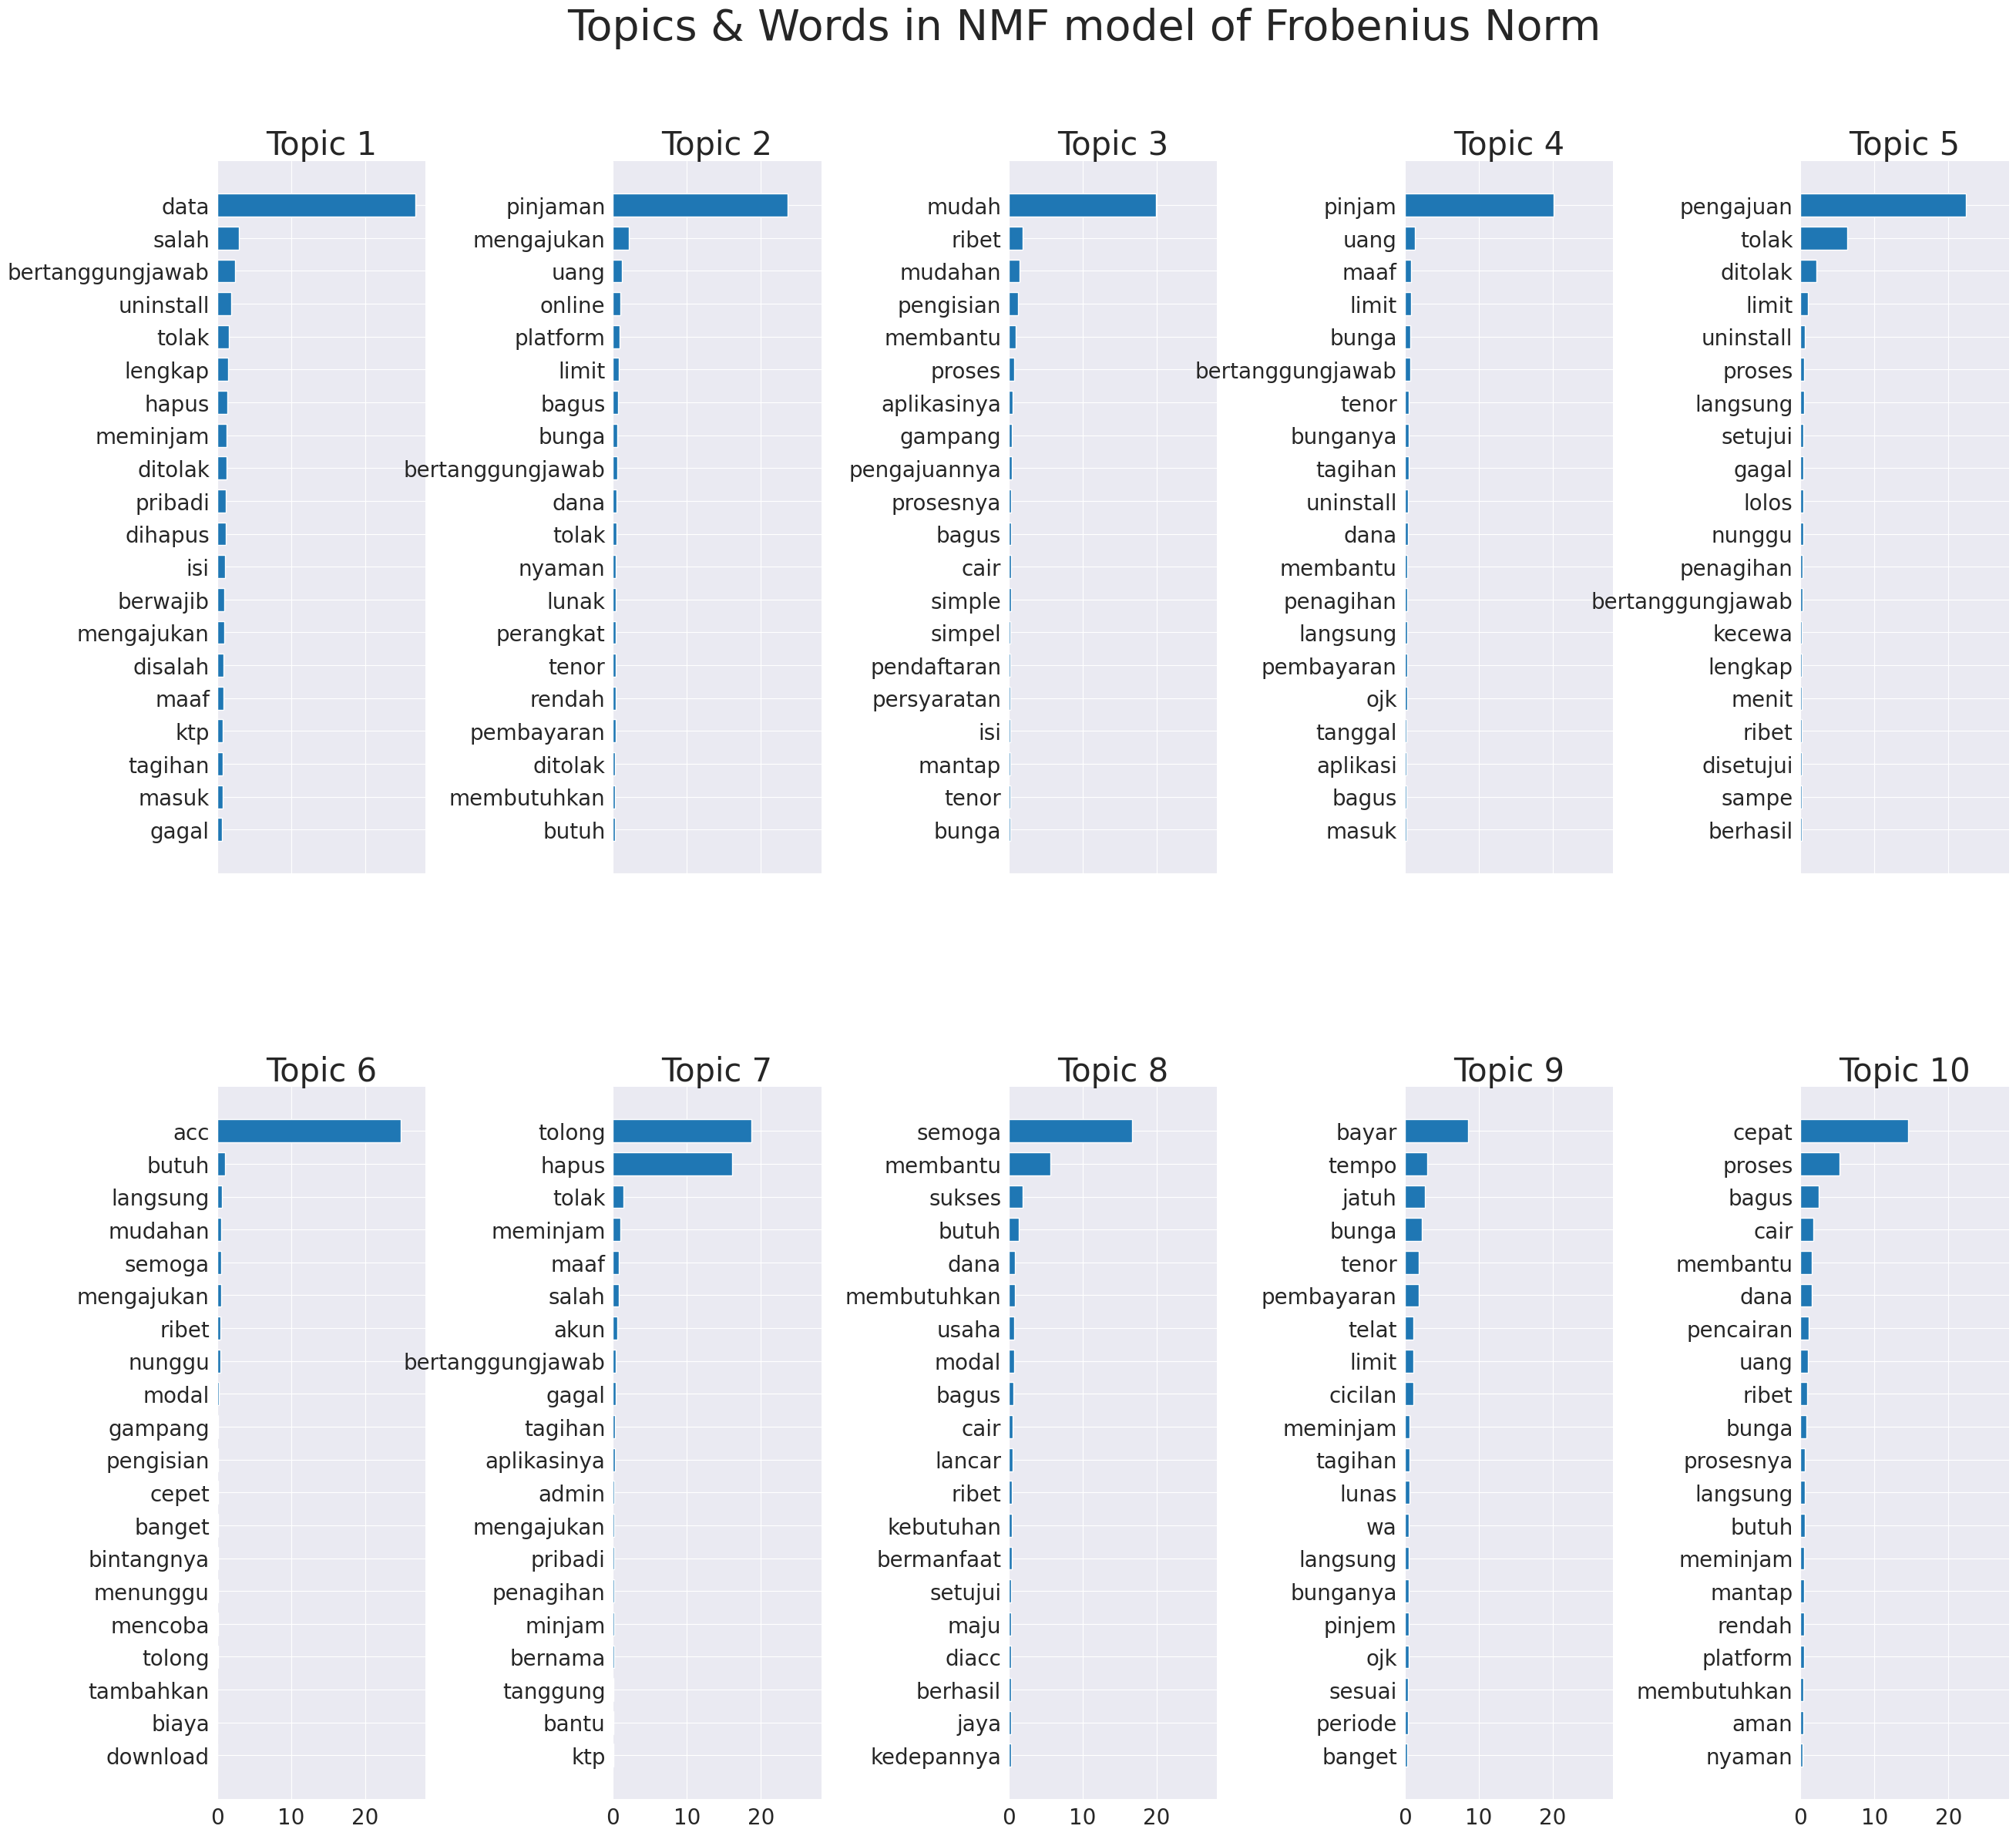

In [ ]:
# Plotting top words from Frobenius Norm
plot_top_words(
    nmf, tf_feature_names, n_top_words, "Topics & Words in NMF model of Frobenius Norm"
)

#### **3.2.1.2 NMF of Generalized Kullback**

In [ ]:
# Fiting the data into NMF model of Generalized Kullback-Leibler Divergence
print(
    "\n" * 2,
    "Fitting the NMF model of Generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)

t0 = time()

nmf = NMF(
    n_components=n_components,
    random_state=566,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tf)

print("Model fiting done in %0.3fs." % (time() - t0))



 Fitting the NMF model of Generalized Kullback-Leibler divergence) with tf-idf features, n_samples=62075 and n_features=5000...
Model fiting done in 16.283s.


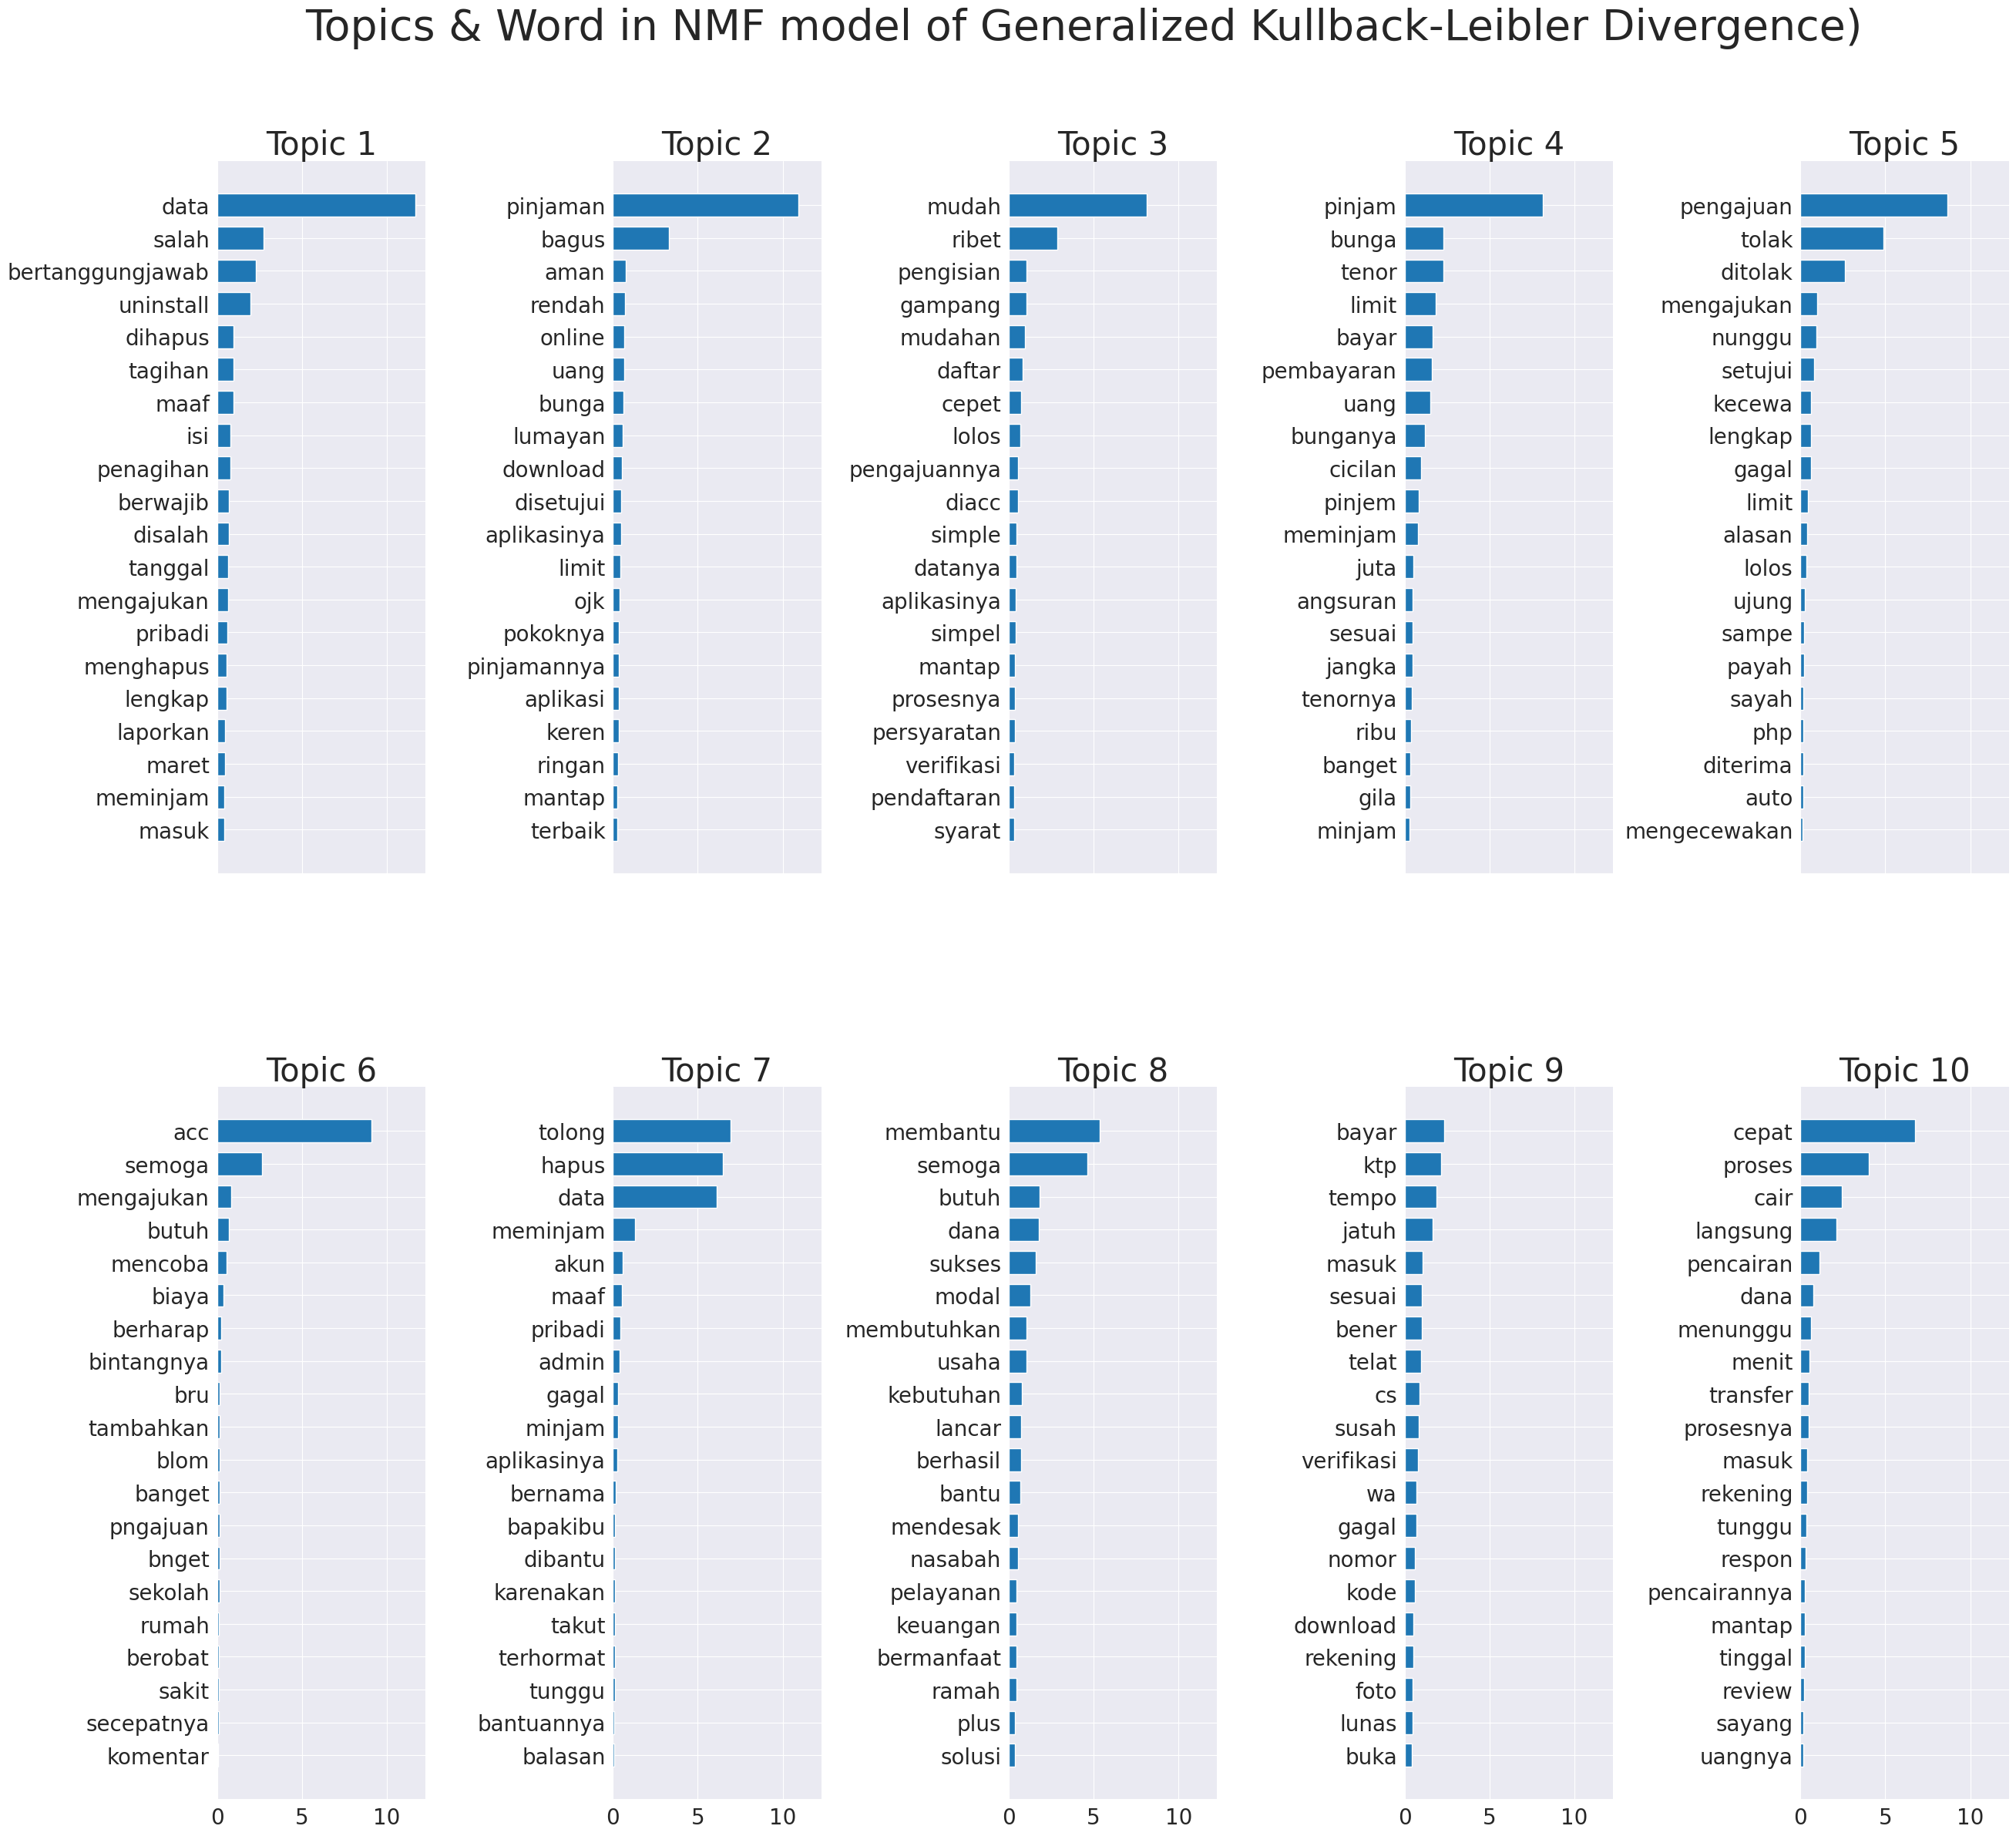

In [ ]:
# Plotting toopic and top words from Generalized Kullback-Leibler Divergence
plot_top_words(
    nmf,
    tf_feature_names,
    n_top_words,
    "Topics & Word in NMF model of Generalized Kullback-Leibler Divergence)",
)

### **3.2.2 Larent Dirichlet Allocation (LDA) Model**

In [ ]:
# Fitting term count features into LDA model
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=566,
)

t0 = time()

lda.fit(tf)

print("done in %0.3fs." % (time() - t0))

done in 35.331s.


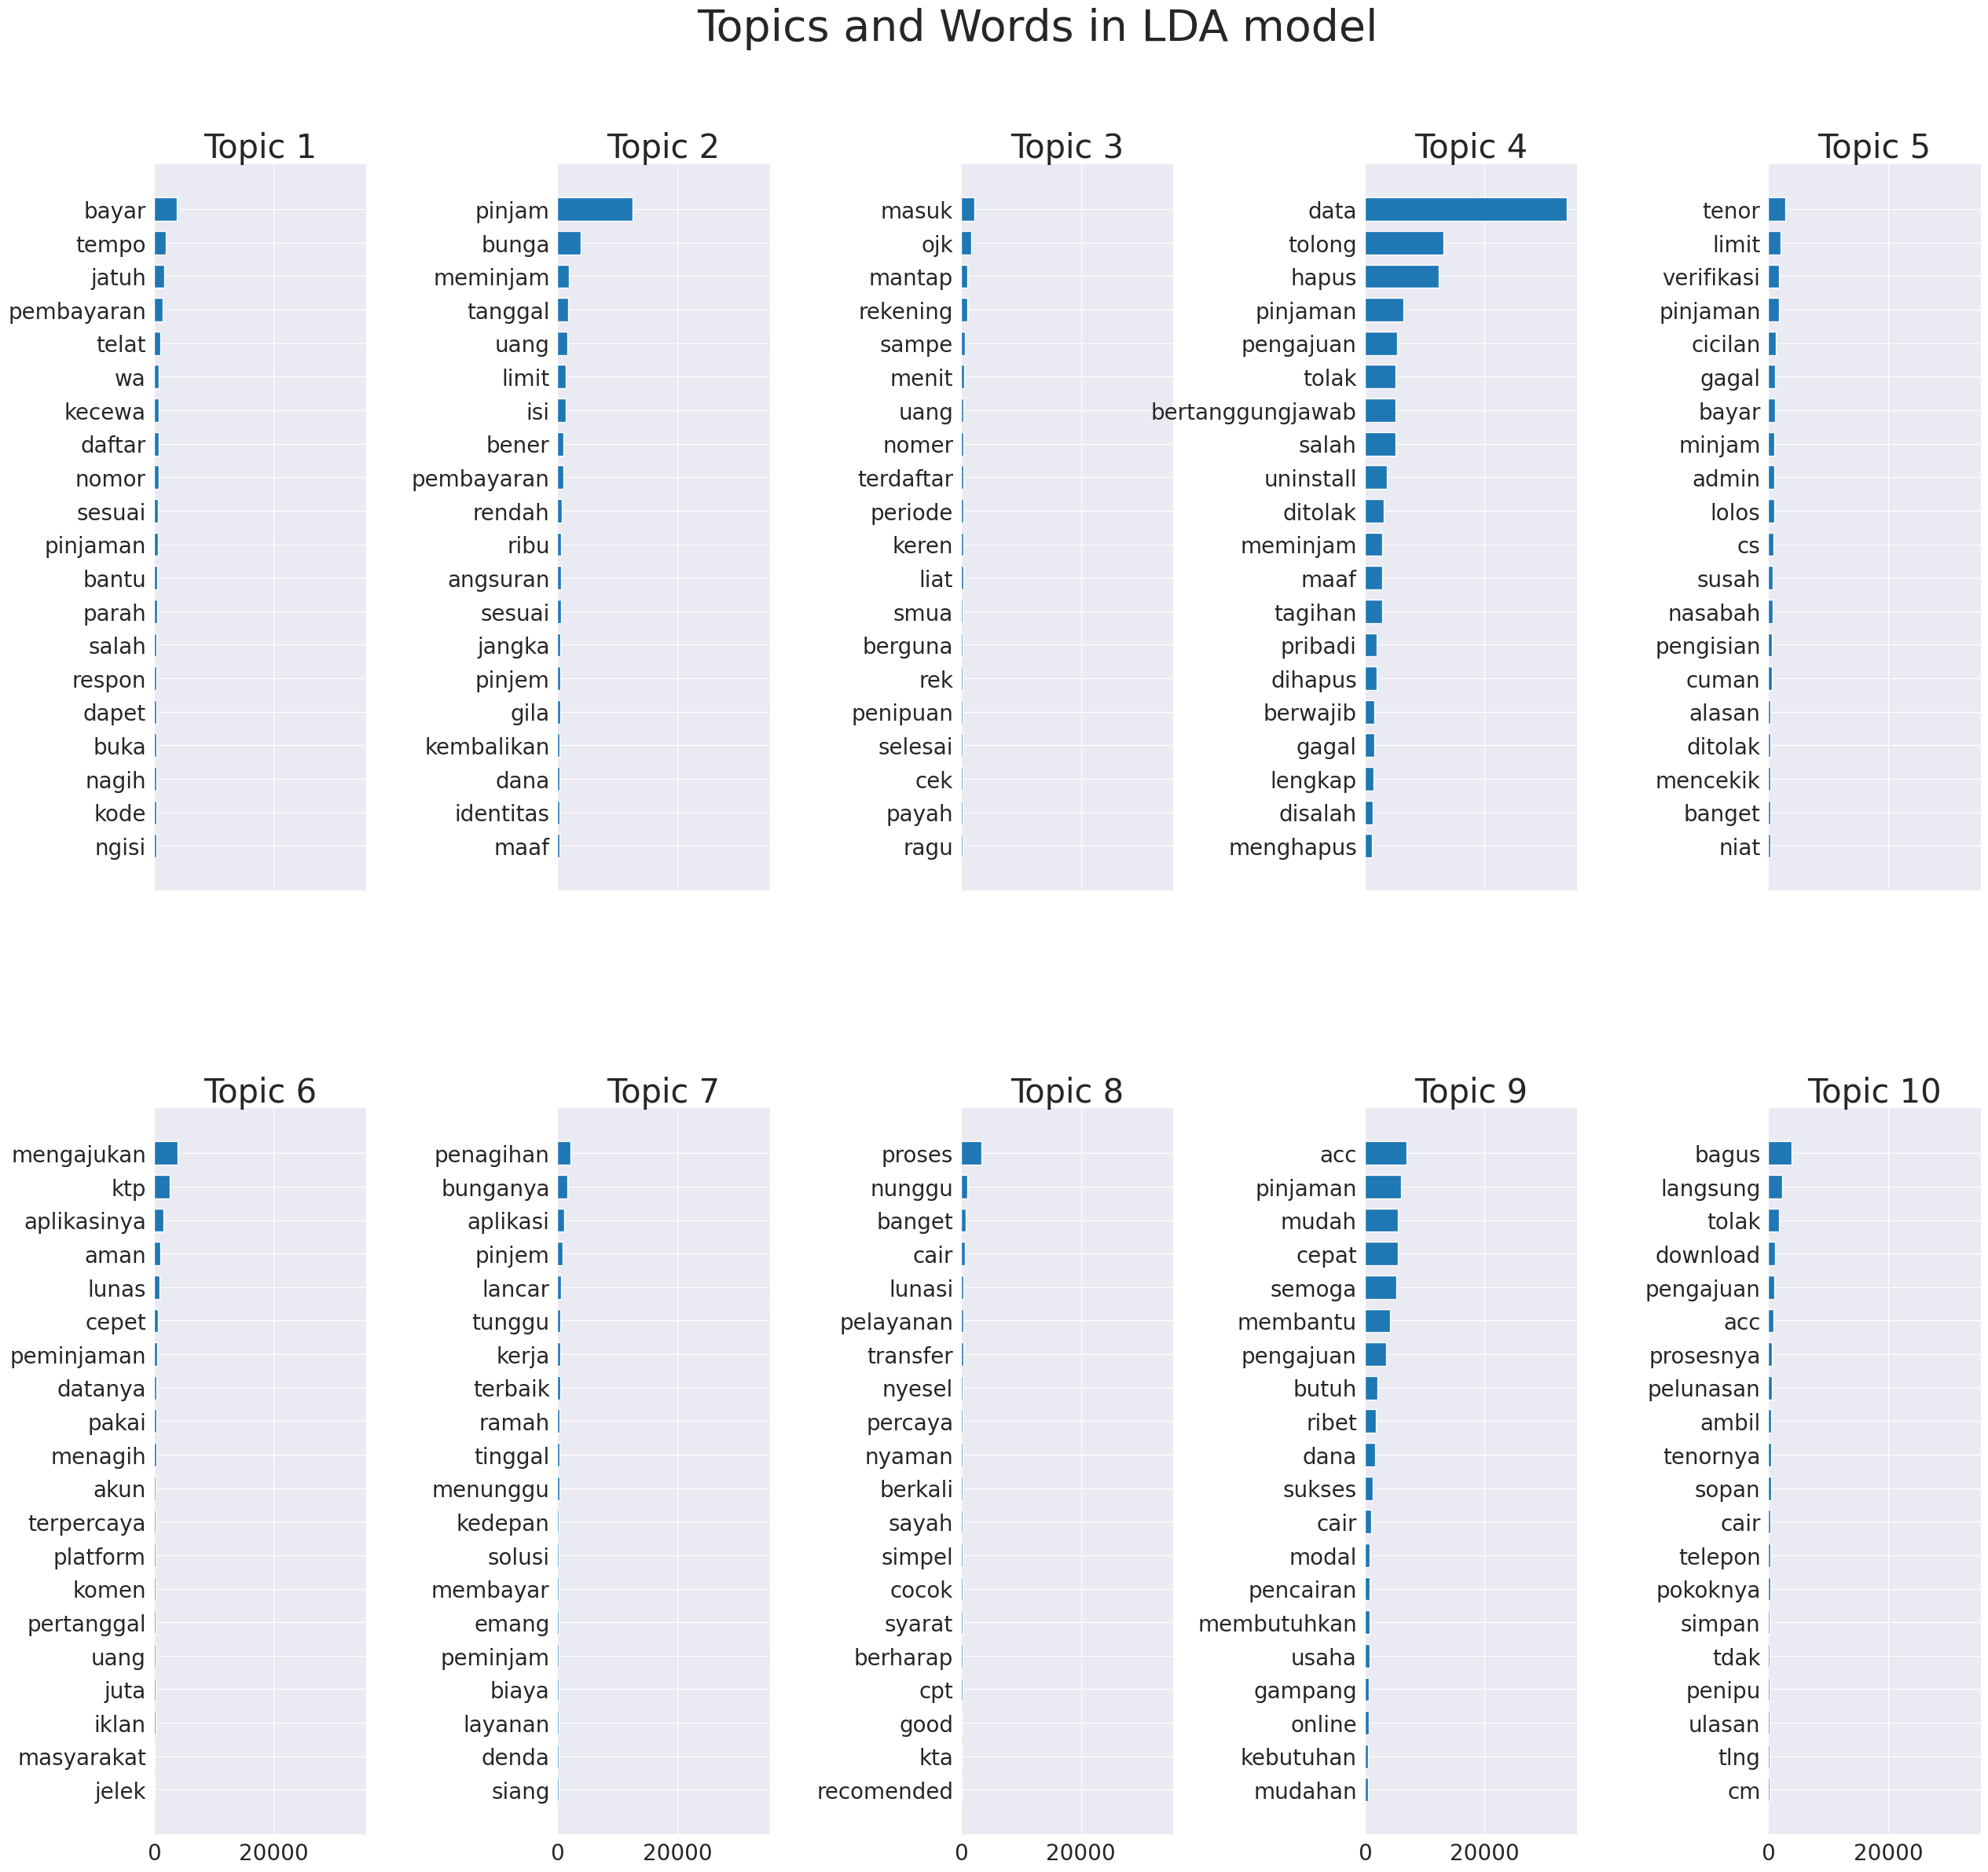

In [ ]:
plot_top_words(lda, tf_feature_names, n_top_words, "Topics and Words in LDA model")

________________

# **4. Movel Evaluation**

## **4.1 Coherence Score**

In [ ]:
# Importing necessary packages
from nltk.tokenize import word_tokenize
import gensim
from gensim.models import CoherenceModel, LdaMulticore
import pandas as pd
import nltk

### **4.1.1 Coherence Score for Unigrams Feature**

In [ ]:
# Reloading the data
data = pd.read_csv("https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_lda/main/normalized_dataa.csv")
data.columns = ['index', 'content']
data = data[['content']]

# Checking data shape
print("Data Shape :", data.shape)
data.head()

Data Shape : (62075, 1)


content
0  saran download aplikasi uang hilangsaya transf...
1  aplikasi fintech bertanggung pendanaan pendana...
2  sudah kena biaya pake payment link kena ribu a...
3  jngn dowload ngambil data trmasuk kk mlah ajui...
4   pas masukin data pribadi mendanai hrs butuh data

In [ ]:
tokenized_words = data['content'].apply(word_tokenize)

In [ ]:
# Creating dictionary
id2word = gensim.corpora.Dictionary(tokenized_words)

# Creating corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tokenized_words]

In [ ]:
# Recording the time
t0 = time()

# Computing the coherence score
no_of_topics = []
coherence_score = []

for i in range(1,11):
    lda_model = LdaMulticore(corpus=corpus,
                            id2word=id2word,
                            iterations=50,
                            num_topics=i,
                            passes=20,
                            workers=2)

    # Instantiating topic coherence model
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_words, dictionary=id2word, coherence='c_v')

    # Getting topic coherence score
    coherence_lda = coherence_model_lda.get_coherence()
    no_of_topics.append(i)
    coherence_score.append(coherence_lda)


print("Modelling done in %0.3fs." % (time() - t0))

Modelling done in 3248.851s.


In [ ]:
coherence_score

[0.4280110418658789,
 0.476711633563222,
 0.5218298287007959,
 0.5485548840369501,
 0.45526619496718224,
 0.5031297148253712,
 0.5016386431900616,
 0.5367951316641439,
 0.5427605220305465,
 0.5009559299043594]

In [ ]:
# Create a dataframe of coherence score by number of topics
topic_coherence = pd.DataFrame({'number_of_topics':no_of_topics,
                               'coherence_score':coherence_score})

# Print topic_coherence dataframe
topic_coherence

number_of_topics  coherence_score
0                 1         0.428011
1                 2         0.476712
2                 3         0.521830
3                 4         0.548555
4                 5         0.455266
5                 6         0.503130
6                 7         0.501639
7                 8         0.536795
8                 9         0.542761
9                10         0.500956

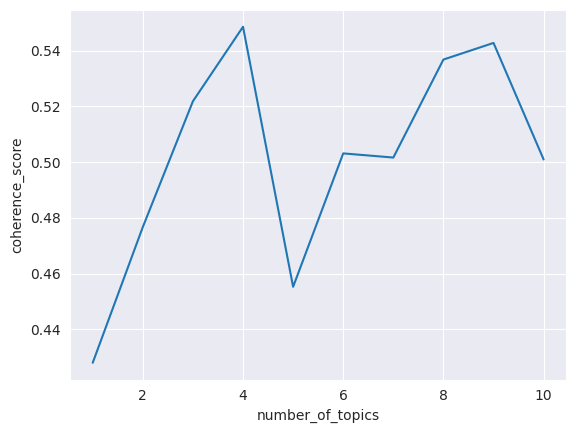

In [ ]:
# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score');

### **4.2 Coherence Score for Unigrams & Bigrams Feature**

In [ ]:
# def get_bigrams(sentence):
#     tokens = nltk.word_tokenize(sentence)
#     return zip(tokens, tokens[1:])

In [ ]:
# a = data['content'].apply(get_bigrams)

In [ ]:
# bigrams = []

# for i in range(len(data)):
#   list_bigrams = [' '.join(b) for b in get_bigrams(data['content'][i])]
#   bigrams.append(list_bigrams)

In [ ]:
# bigrams = pd.Series(bigrams)
# bigrams[:2]

In [ ]:
# tokenized_words[:5]

In [ ]:
# full_tokenized_words = pd.concat([tokenized_words, bigrams])
# len(full_tokenized_words)

In [ ]:
# # Creating dictionary
# id2word = gensim.corpora.Dictionary(full_tokenized_words)

# # Creating corpus: Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in full_tokenized_words]

In [ ]:
# # Recording the time
# t0 = time()

# # Computing the coherence score
# no_of_topics = []
# coherence_score = []

# for i in range(1,11):
#     lda_model = LdaMulticore(corpus=corpus,
#                             id2word=id2word,
#                             iterations=50,
#                             num_topics=i,
#                             passes=20,
#                             workers=2)

#     # Instantiating topic coherence model
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_words, dictionary=id2word, coherence='c_v')

#     # Getting topic coherence score
#     coherence_lda = coherence_model_lda.get_coherence()
#     no_of_topics.append(i)
#     coherence_score.append(coherence_lda)


# print("Modelling done in %0.3fs." % (time() - t0))

In [ ]:
# coherence_score

In [ ]:
# # Create a dataframe of coherence score by number of topics
# topic_coherence = pd.DataFrame({'number_of_topics':no_of_topics,
#                                'coherence_score':coherence_score})

# # Print topic_coherence dataframe
# topic_coherence

In [ ]:
# # Print a line plot
# sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score');

# **5. Experimenting with Different Topics Numbers**

## **5.1 Application of 8 Topics into Non-Negative Matrix Factorization**

In [ ]:
# Initiating 8 topics
new_n_components = 8

# defining function to plot words and 8 topics
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 8, figsize=(15, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 7})
        ax.tick_params(axis="both", which="major", labelsize=10)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

### **5.1.1 NMF of Frobenius Norm**

In [ ]:
# Fiting the data into NMF model of Frobenius Norm
print(
    "Fitting the NMF model (Frobenius Norm) with term count features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)

t0 = time()

nmf = NMF(
    n_components=new_n_components,
    random_state=566,
    init=init,
    solver='cd',
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tf)

print("Model fitting done in %0.3fs." % (time() - t0))

Fitting the NMF model (Frobenius Norm) with term count features, n_samples=62075 and n_features=5000...
Model fitting done in 3.714s.


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


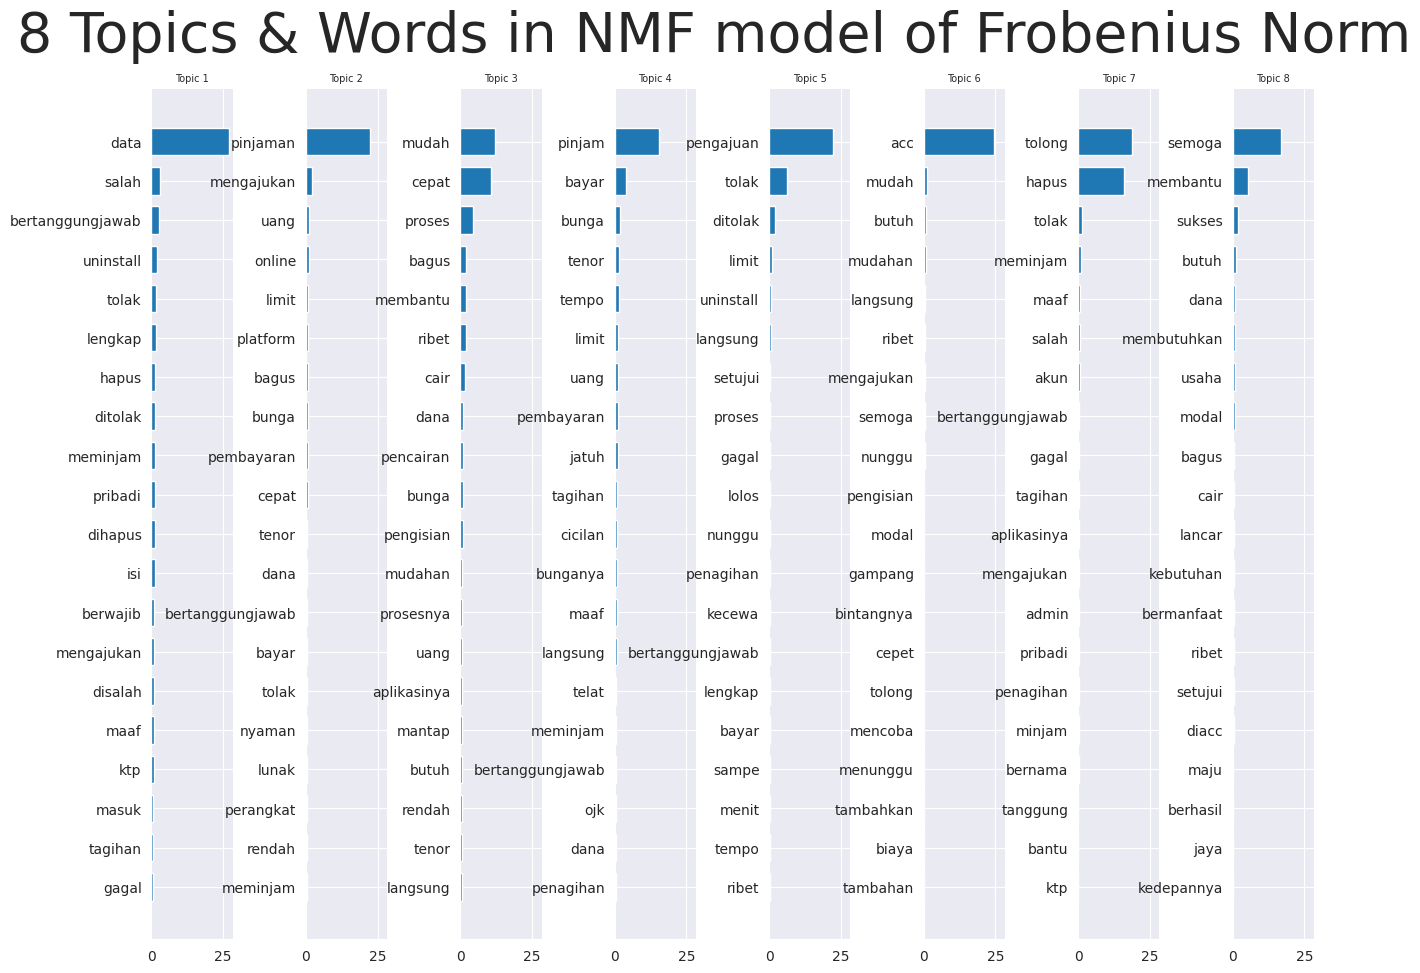

In [ ]:
# Plotting top words from Frobenius Norm
plot_top_words(
    nmf, tf_feature_names, n_top_words, "8 Topics & Words in NMF model of Frobenius Norm"
)

### **5.1.2 NMF of Generalized Kullback**

In [ ]:
# Fiting the data into NMF model of Generalized Kullback-Leibler Divergence
print(
    "\n" * 2,
    "Fitting the NMF model of Generalized Kullback-Leibler "
    "divergence) with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)

t0 = time()

nmf = NMF(
    n_components=new_n_components,
    random_state=566,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tf)

print("Model fiting done in %0.3fs." % (time() - t0))



 Fitting the NMF model of Generalized Kullback-Leibler divergence) with tf features, n_samples=62075 and n_features=5000...
Model fiting done in 19.279s.


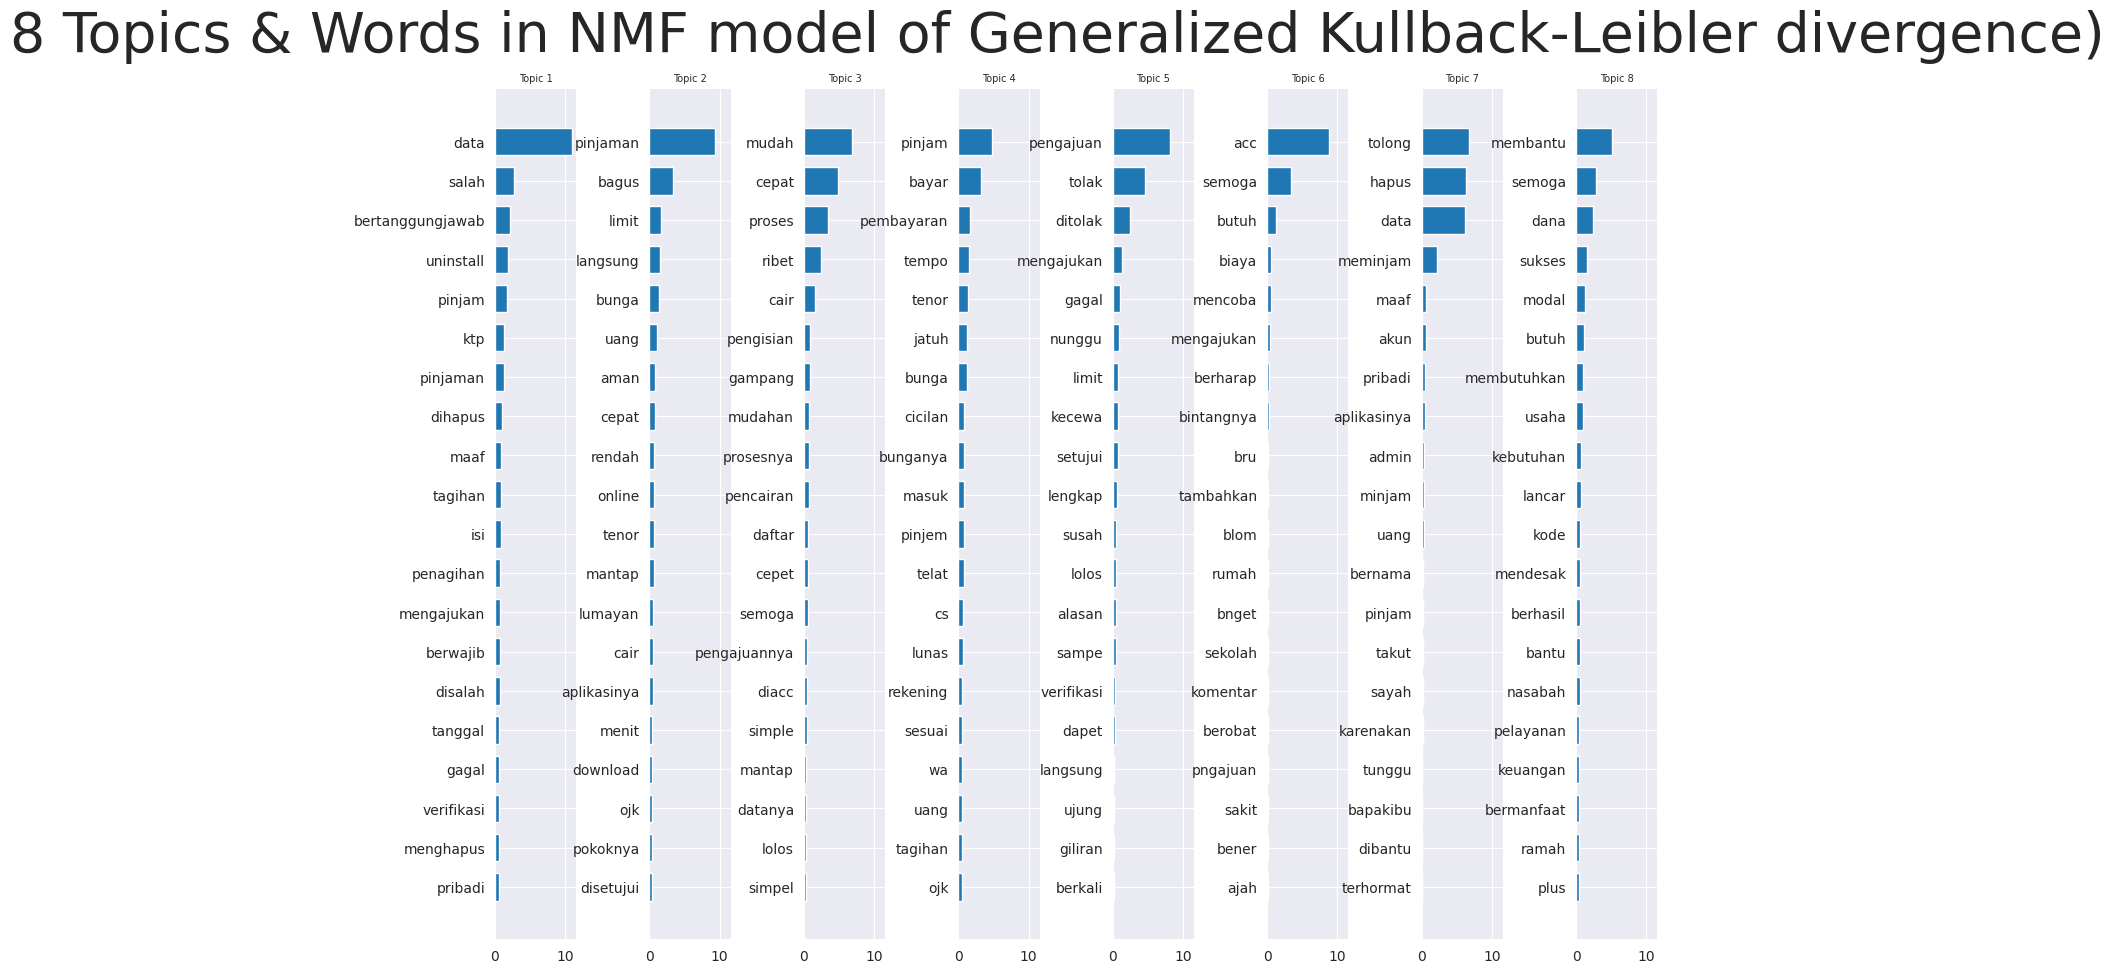

In [ ]:
# Plotting top words from NMF model of Generalized Kullback-Leibler divergence)
plot_top_words(
    nmf, tf_feature_names, n_top_words, "8 Topics & Words in NMF model of Generalized Kullback-Leibler divergence)"
)

## **5.2 Application of 8 Topics into Larent Dirilichet (LDA) Model**

### **5.2.1 LDA Modeling**

In [ ]:
# Fitting term count features into LDA model
lda = LatentDirichletAllocation(
    n_components=new_n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=566,
)

t0 = time()

lda.fit(tf)

print("done in %0.3fs." % (time() - t0))

done in 38.538s.


### **5.2.2 Plotting Topics, Words and its weights**

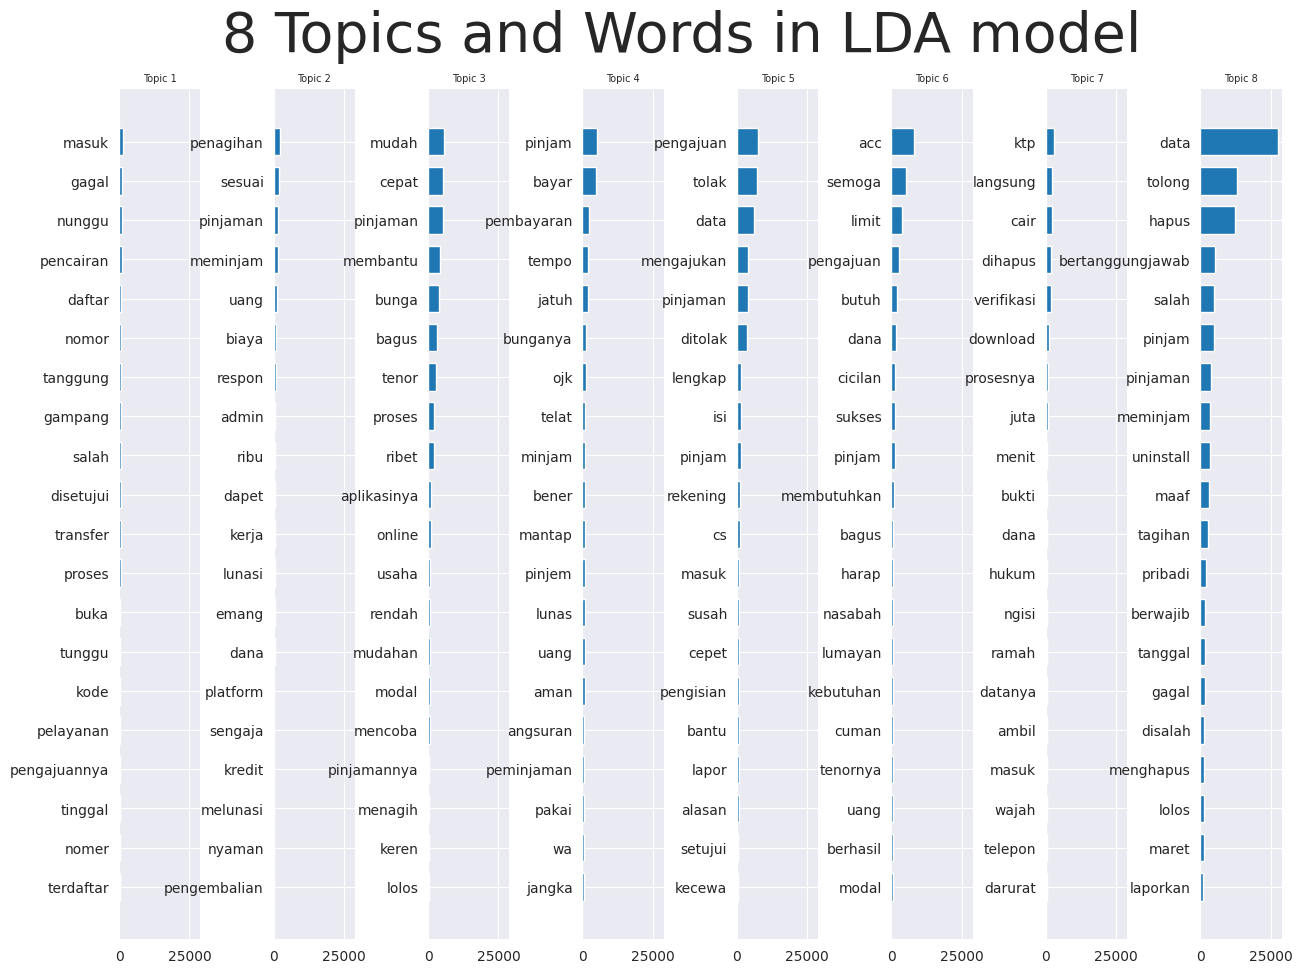

In [ ]:
plot_top_words(lda, tf_feature_names, n_top_words, "8 Topics and Words in LDA model")

In [ ]:
# defining function to show words and topics
def getting_top_words_and_weights(model, feature_names, n_top_words):

  ft = []
  wg = []

  # Extracting topics and weights
  for topic_idx, topic in enumerate(model.components_):
       top_features_ind = topic.argsort()[-n_top_words:]
       top_features = feature_names[top_features_ind]
       weights = topic[top_features_ind]

       ft.append(top_features)
       wg.append(weights)

  return ft, wg

# Executing function to get top words and wights
ft, wg = getting_top_words_and_weights(lda, tf_feature_names, n_top_words)

In [ ]:
# Showing the topic, words and its weights
counter = 0

for i in range(8):
  for j in range(20):
    if counter % 20 == 0:
      print(f"\n \033[1m - Topik {i+1}\033[0m")
    else:
      pass

    counter+=1

    print(f"Kata {j+1} : {ft[i][j]}")
    print(f"+ Bobot : {wg[i][j]}")


  - Topik 1
Kata 1 : terdaftar
+ Bobot : 379.4685708214391
Kata 2 : nomer
+ Bobot : 383.5015492904183
Kata 3 : tinggal
+ Bobot : 395.4947327730158
Kata 4 : pengajuannya
+ Bobot : 416.30989004285675
Kata 5 : pelayanan
+ Bobot : 429.516162011189
Kata 6 : kode
+ Bobot : 433.83771305516075
Kata 7 : tunggu
+ Bobot : 443.56947478664193
Kata 8 : buka
+ Bobot : 459.9707804916454
Kata 9 : proses
+ Bobot : 519.5918026028545
Kata 10 : transfer
+ Bobot : 539.7280024485924
Kata 11 : disetujui
+ Bobot : 552.1997716202773
Kata 12 : salah
+ Bobot : 666.8756163811124
Kata 13 : gampang
+ Bobot : 774.4636640160097
Kata 14 : tanggung
+ Bobot : 781.9099369866392
Kata 15 : nomor
+ Bobot : 782.5590540275152
Kata 16 : daftar
+ Bobot : 787.6512490175949
Kata 17 : pencairan
+ Bobot : 1043.0970987123328
Kata 18 : nunggu
+ Bobot : 1071.8316173509543
Kata 19 : gagal
+ Bobot : 1192.842528187732
Kata 20 : masuk
+ Bobot : 1222.1168497471758

  - Topik 2
Kata 1 : pengembalian
+ Bobot : 282.9785076573894
Kata 2 : nyam

## **5.3 Labeling Topic on Data with LDA**

In [ ]:
# Getting weight of every data
# Result is probability
topic_weight = lda.transform(tf)
topic_weight.shape

(62075, 8)

In [ ]:
# Previewing the topic weight
topic_weight

array([[0.12567381, 0.1980798 , 0.00833333, ..., 0.00833803, 0.50499475,
        0.00833376],
       [0.01136364, 0.14109406, 0.01136364, ..., 0.20841203, 0.01136372,
        0.20101684],
       [0.02083333, 0.52084173, 0.02083333, ..., 0.02083333, 0.02083333,
        0.02083333],
       ...,
       [0.01388889, 0.01388889, 0.01388889, ..., 0.0138953 , 0.01388889,
        0.53861131],
       [0.02083333, 0.02083333, 0.02083333, ..., 0.52081538, 0.02083333,
        0.18748989],
       [0.03125   , 0.03125   , 0.03125   , ..., 0.53125912, 0.03125   ,
        0.03125   ]])

In [ ]:
# Getting the label for every data
label = [np.argmax(i) for i in topic_weight]

# Preview label
label[:5]

[6, 3, 1, 5, 7]

In [ ]:
clean_normalized_data_with_label = pd.concat([pd.DataFrame(normalized_data), pd.DataFrame(label)], axis=1)
clean_normalized_data_with_label.columns = ['data', 'label']
clean_normalized_data_with_label.head()

data  label
0  saran download uang hilangsaya transfer dana q...      6
1  fintech bertanggungjawab pendanaan pendanaan t...      3
2  biaya payment link ribu asli banget feenya tin...      1
3  dowload ngambil data trmasuk kk mlah ajuin mrk...      5
4       masukin data pribadi mendanai hrs butuh data      7

<Axes: title={'center': 'Label Distribution'}>

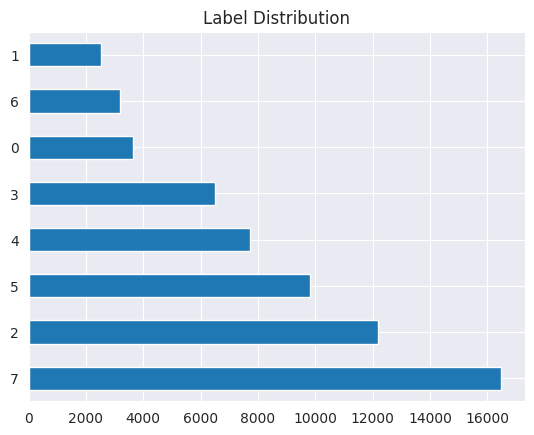

In [ ]:
clean_normalized_data_with_label.label.value_counts().plot(kind='barh',
                                                           title='Label Distribution')

# **6. Sentimen Analysis**

## **6.1 Model Training**

In [ ]:
# Flag to the code afterwards couldn't be run
print(

In [ ]:
# Installing necessary package for training sentiment model
!pip install ktrain

In [ ]:
# Importin packages for model training
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text

In [ ]:
sentiment_url ="https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_lda/main/data_indonesia_only.csv"

In [ ]:
# Loading the data into pandas dataframe
sentiment_data = pd.read_csv(sentiment_url)
sentiment_data = sentiment_data[['data', 'sentimen']]

sentiment_data.shape

In [ ]:
# Checking the first 5 data
sentiment_data.head()

In [ ]:
# Plotting total data by sentiment
sentiment_data.sentimen.value_counts().plot(kind="bar")

In [ ]:
# Splitting the data before trained
X_train, X_test, y_train, y_test = train_test_split(sentiment_data['data'],
                                                    sentiment_data['sentimen'],
                                                    test_size=0.3,
                                                    random_state=422,
                                                    stratify=sentiment_data['sentimen'])

In [ ]:
# Checking our data for the sentiment model
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

In [ ]:
!nvidia-smi

### **6.1.1 DistilBert Base Uncased Model**

DistilBERT is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark.

- Reference : https://arxiv.org/abs/1910.01108

In [ ]:
# Defining the model name
MODEL_NAME = 'distilbert-base-uncased'

# Defining our Transformer Object with specific max length and defining the class names
t = text.Transformer(MODEL_NAME, maxlen=256, class_names=sentiment_data['sentimen'].unique())

# Converting the train and validation data into list
train = t.preprocess_train(X_train.to_list(), y_train.to_list())
val = t.preprocess_test(X_test.to_list(), y_test.to_list())

In [ ]:
# Defining model object
model = t.get_classifier()

# Passing the model, train, validation data and batch size
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=6)

In [ ]:
# Fitting data into model and saving the weights
# learner.fit_onecycle(2e-5, 2, checkpoint_folder='checkpoint/distilbert/')

In [ ]:
# Getting model evaluation
learner.evaluate()

___________


### **6.1.2 Bert Base Uncased Model**

BERT is designed to pretrain deep bidirectional representations from unlabeled text by jointly conditioning on both left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer to create state-of-the-art models for a wide range of tasks, such as question answering and language inference, without substantial taskspecific architecture modifications.

- Reference : https://arxiv.org/abs/1810.04805

In [ ]:
# Defining the model name
MODEL_NAME = 'bert-base-uncased'

# Defining our Transformer Object with specific max length and defining the class names
t = text.Transformer(MODEL_NAME, maxlen=256, class_names=sentiment_data['sentimen'].unique())

# Converting the train and validation data into list
train = t.preprocess_train(X_train.to_list(), y_train.to_list())
val = t.preprocess_test(X_test.to_list(), y_test.to_list())

In [ ]:
# Defining model object
model = t.get_classifier()

# Passing the model, train, validation data and batch size
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=12)

In [ ]:
# Fitting data into model and saving the weights
# learner.fit_onecycle(2e-5, 2, checkpoint_folder='checkpoint/bert_base_uncase/')

In [ ]:
# Getting model evaluation
learner.evaluate()

In [ ]:
# Getting model predictor
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
# Saving model into content folder of google colab
predictor.save('model/bert_base_uncased/')

In [ ]:
# Zipping all files into one to easily downloaded
# !zip -r /content/file.zip /content/model/bert_base_uncased

## **6.2 Model Loading**

In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 27.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 49.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [ ]:
# Importing necessaary packages
import pandas as pd
import ktrain
import tensorflow as tf

In [ ]:
# Checking available GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Mounting GDrive since the folder model previously saved there
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the model predictor
sentiment_model_bert = ktrain.load_predictor('/content/drive/MyDrive/Project/model/bert_base_uncased')

- As we can see below, the model can predict the sentiment for all the sentences.

In [ ]:
# Making some sentences to test the model
sentences = ["Saya suka film ini. Ceritanya sangat bagus!", "Saya tidak suka buku ini, sangat membosankan.", "Nama saya Rudi. Kalau kamu?"]

# Testing the model with inference sentences
sentiment_model_bert.predict(sentences)

['positif', 'negatif', 'netral']

In [ ]:
final_data = pd.read_csv("/content/drive/MyDrive/Project/normalized_data.csv")
final_data.columns = ["index", "content"]
final_data = final_data[['content']]
final_data.head()

content
0  saran download aplikasi uang hilangsaya transf...
1  aplikasi fintech bertanggung pendanaan pendana...
2  sudah kena biaya pake payment link kena ribu a...
3  jngn dowload ngambil data trmasuk kk mlah ajui...
4   pas masukin data pribadi mendanai hrs butuh data

## **6.3 Sentiment Prediction**

In [ ]:
# Recording the time
t0 = time()

# Predicting the data with sentiment model
prediction = sentiment_model_bert.predict(list(final_data.content))

print("Prediction done in %0.3fs." % (time() - t0))

Model fitting done in 340.501s.


In [ ]:
len(prediction)

62075

In [ ]:
prediction_df = pd.DataFrame(prediction)
prediction_df.head()

0
0  negatif
1  negatif
2  negatif
3  negatif
4   netral

In [ ]:
# prediction_df.to_csv("prediction.csv")

In [ ]:
prediction = pd.read_csv("https://raw.githubusercontent.com/daniel-satria/topic_modelling_nmf_lda/main/prediction.csv",
                         header=0)
prediction.columns = ['index', 'sentimen']
prediction = prediction[['sentimen']]
prediction.head()

sentimen
0  negatif
1  negatif
2  negatif
3  negatif
4   netral

In [ ]:
prediction.shape

(62075, 1)

In [ ]:
full_data = pd.concat([clean_normalized_data_with_label, prediction],
                      axis=1)

full_data.head()

data  label sentimen
0  saran download uang hilangsaya transfer dana q...      6  negatif
1  fintech bertanggungjawab pendanaan pendanaan t...      3  negatif
2  biaya payment link ribu asli banget feenya tin...      1  negatif
3  dowload ngambil data trmasuk kk mlah ajuin mrk...      5  negatif
4       masukin data pribadi mendanai hrs butuh data      7   netral

In [ ]:
# full_data.to_csv("full_data_29_11.csv")

## **6.4 Showing Full Final Data & Visualization**

In [ ]:
full_data.dropna(inplace=True)
len(full_data)

62074

In [ ]:
full_data.head()

data  label sentimen
0  saran download uang hilangsaya transfer dana q...      6  negatif
1  fintech bertanggungjawab pendanaan pendanaan t...      3  negatif
2  biaya payment link ribu asli banget feenya tin...      1  negatif
3  dowload ngambil data trmasuk kk mlah ajuin mrk...      5  negatif
4       masukin data pribadi mendanai hrs butuh data      7   netral

In [ ]:
full_data.tail()

data  label sentimen
62070              tolong data jagadan tolong data hapus      7   netral
62071            meminjam gope potongan besar mikir kale      6   netral
62072  pujiono uninstall pengajuan tolak tolong dijag...      7  negatif
62073                semoga acc butu dokter tolong bantu      5  positif
62074                      mnjmm acc muluu yh mnjm tolaj      5  negatif

In [ ]:
# Dividing data by sentiment
negative_grouped = full_data[full_data['sentimen'] == 'negatif']
netral_grouped = full_data[full_data['sentimen'] == 'netral']
positive_grouped = full_data[full_data['sentimen'] == 'positif']

<Figure size 2400x1200 with 0 Axes>

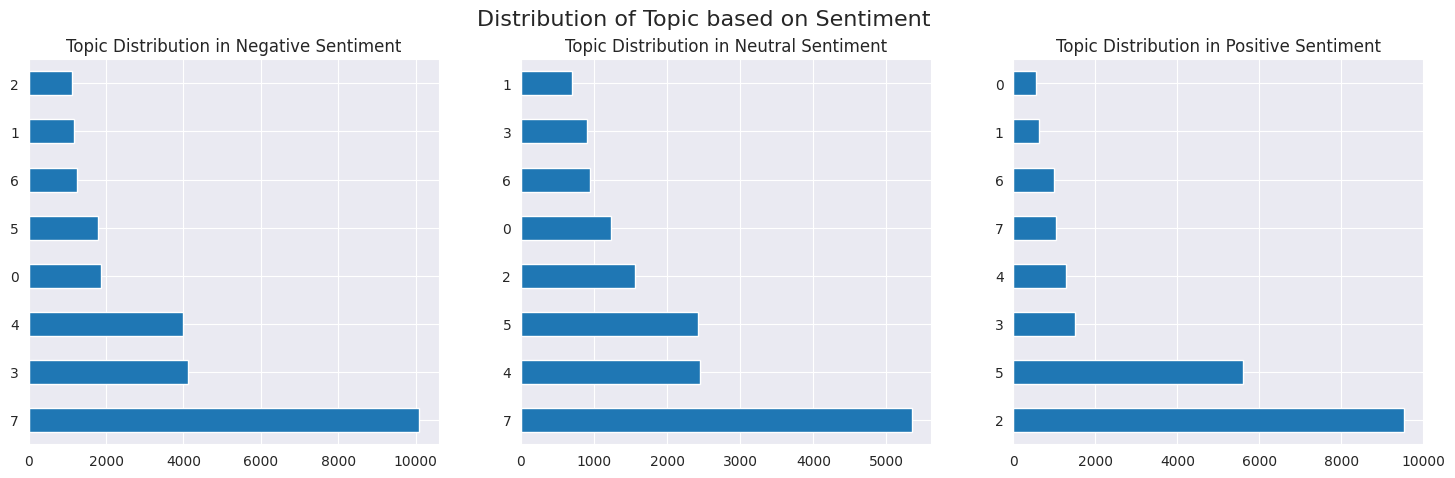

In [ ]:
# Defining subplot layout
plt.figure(figsize=(24,12))
fig, axes = plt.subplots(nrows=1, ncols=3)
axes.flatten()
# fig.subplots_adjust(top=0.9, wspace=0.3, hspace=0.9)
fig.suptitle(f'Distribution of Topic based on Sentiment', fontsize=16)

negative_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Negative Sentiment',
                                           ax=axes[0], figsize=(18,5))

netral_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Neutral Sentiment',
                                           ax=axes[1], figsize=(18,5))

positive_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Positive Sentiment',
                                           ax=axes[2], figsize=(18,5))

plt.show()

<Axes: title={'center': 'Sentiment Distribution over Data'}>

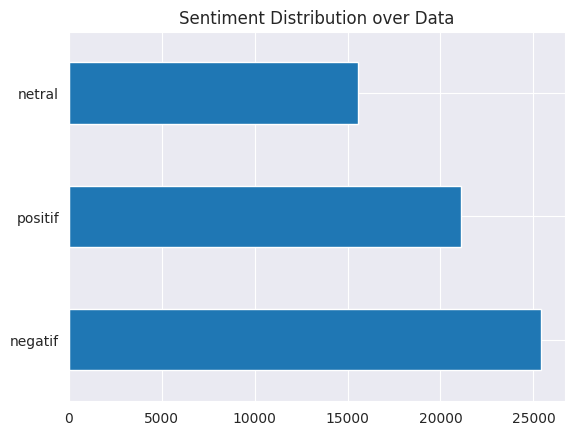

In [ ]:
full_data.sentimen_bert.value_counts().plot(kind='barh',
                                            title="Sentiment Distribution over Data")

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/daniel-satria/tpc_mdl/main/p2p_data_14oct.csv")

def sentiment_round_up(x):
  x = np.array(x)
  return "negatif" if (x < 3) else "netral" if (x == 3) else "positif"

raw_data['sentimen_score'] = raw_data['score'].apply(sentiment_round_up)

Unnamed: 0                                            content jenis  \
0           0  saran saya jangan di download aplikasi ini jik...  koin   
1           1  aplikasi fintech     yang tidak bertanggung ja...  koin   
2           2  udh kena biaya pake payment link masa kena   r...  koin   
3           3  jngn di dowload mereka ngambil data kita trmas...  koin   
4           4  kenapa pas masukin data pribadi selalu tidak b...  koin   

                at  score       Dates      Time  year  month tahunbulanku  
0  4/25/2023 22:36      1  2023-04-25  22:36:00  2023      4       2023-4  
1  4/25/2023 17:39      1  2023-04-25  17:39:00  2023      4       2023-4  
2   4/25/2023 3:08      1  2023-04-25  03:08:00  2023      4       2023-4  
3  4/21/2023 18:30      1  2023-04-21  18:30:00  2023      4       2023-4  
4   4/21/2023 4:35      1  2023-04-21  04:35:00  2023      4       2023-4

In [ ]:
full_data['sentiment_score'] = raw_data['sentimen_score'].copy()
full_data.columns = ['data', 'topik', 'sentimen_bert', 'sentiment_score']
full_data.head()

data  topik sentimen_bert  \
0  saran download uang hilangsaya transfer dana q...      6       negatif   
1  fintech bertanggungjawab pendanaan pendanaan t...      3       negatif   
2  biaya payment link ribu asli banget feenya tin...      1       negatif   
3  dowload ngambil data trmasuk kk mlah ajuin mrk...      5       negatif   
4       masukin data pribadi mendanai hrs butuh data      7        netral   

  sentiment_score  
0         negatif  
1         negatif  
2         negatif  
3         negatif  
4         negatif

In [ ]:
full_data.tail()

data  topik sentimen_bert  \
62070              tolong data jagadan tolong data hapus      7        netral   
62071            meminjam gope potongan besar mikir kale      6        netral   
62072  pujiono uninstall pengajuan tolak tolong dijag...      7       negatif   
62073                semoga acc butu dokter tolong bantu      5       positif   
62074                      mnjmm acc muluu yh mnjm tolaj      5       negatif   

      sentiment_score  
62070         positif  
62071         negatif  
62072         positif  
62073         positif  
62074         negatif

In [ ]:
from sklearn.metrics import accuracy_score

# Calculating accuracy score
accuracy_data = accuracy_score(full_data['sentiment_score'], full_data['sentimen'])

print(f"The accuracy score is {accuracy_data}")

The accuracy score is 0.6084350935979638


<Figure size 4800x2400 with 0 Axes>

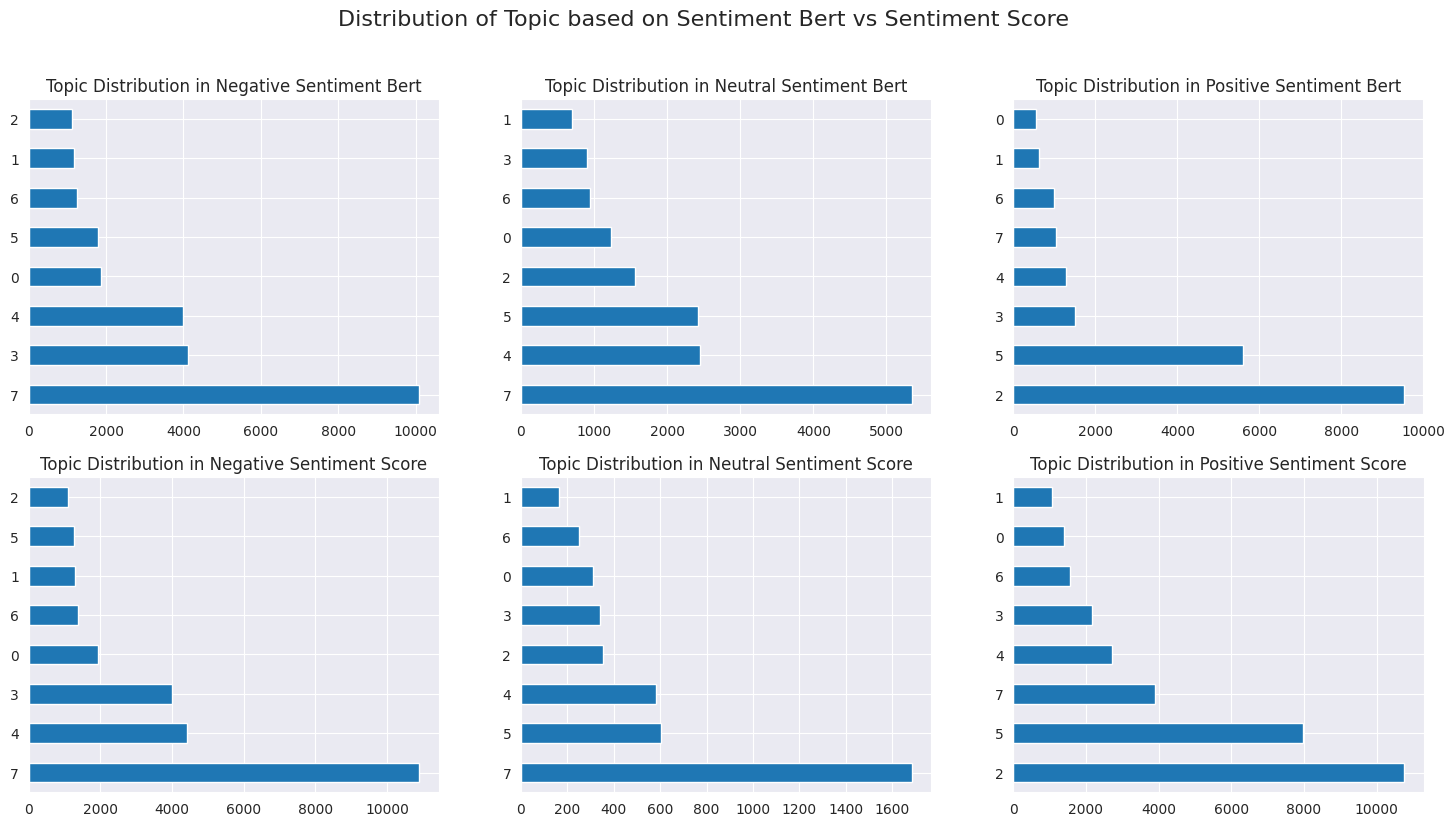

In [ ]:
# Dividing data by sentiment
negative_grouped_score = full_data[full_data['sentiment_score'] == 'negatif']
netral_grouped_score = full_data[full_data['sentiment_score'] == 'netral']
positive_grouped_score = full_data[full_data['sentiment_score'] == 'positif']


# Defining subplot layout
plt.figure(figsize=(48,24))
fig, axes = plt.subplots(nrows=2, ncols=3)
# axes.flatten()
fig.suptitle('Distribution of Topic based on Sentiment Bert vs Sentiment Score',fontsize=16)

negative_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Negative Sentiment Bert',
                                           ax=axes[0,0], figsize=(18,9))

netral_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Neutral Sentiment Bert',
                                           ax=axes[0,1], figsize=(18,9))

positive_grouped.label.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Positive Sentiment Bert',
                                           ax=axes[0,2], figsize=(18,9))

negative_grouped_score.topik.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Negative Sentiment Score',
                                           ax=axes[1,0], figsize=(18,9))

netral_grouped_score.topik.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Neutral Sentiment Score',
                                           ax=axes[1,1], figsize=(18,9))

positive_grouped_score.topik.value_counts().plot(kind='barh',
                                           title='Topic Distribution in Positive Sentiment Score',
                                           ax=axes[1,2], figsize=(18,9))

plt.show()

In [ ]:
negative_grouped_score

data  topik sentimen_bert  \
0      saran download uang hilangsaya transfer dana q...      6       negatif   
1      fintech bertanggungjawab pendanaan pendanaan t...      3       negatif   
2      biaya payment link ribu asli banget feenya tin...      1       negatif   
3      dowload ngambil data trmasuk kk mlah ajuin mrk...      5       negatif   
4           masukin data pribadi mendanai hrs butuh data      7        netral   
...                                                  ...    ...           ...   
62066  pinjemduit melunasi waktuny wlau limit lmyan b...      7        netral   
62067  percaya gaess coment pinjam semuaini mengambil...      4       negatif   
62069  rina noviani menghapus data pribadi pengajuan ...      7       negatif   
62071            meminjam gope potongan besar mikir kale      6        netral   
62074                      mnjmm acc muluu yh mnjm tolaj      5       negatif   

      sentiment_score  
0             negatif  
1             negatif  
2             negatif  
3             negatif  
4             negatif  
...               ...  
62066         negatif  
62067         negatif  
62069         negatif  
62071         negatif  
62074         negatif  

[26301 rows x 4 columns]